Name: SRIVATSAN SARVESAN

Roll No: DA24E001

EE5179: Deep Learning for Imaging

Programming Assignment 4: Recurrent Neural Networks

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch import nn
import math

In [3]:
transform = transforms.ToTensor()
train_set = datasets.MNIST('', download=True, train=True, transform=transform)
test_set = datasets.MNIST('',download=True, train=False, transform=transform)
trainset,valset=torch.utils.data.random_split(train_set,(50000,10000))
trainloader = torch.utils.data.DataLoader(trainset,batch_size=500)
valloader = torch.utils.data.DataLoader(valset,batch_size=500)
testloader = torch.utils.data.DataLoader(test_set,batch_size=500)

In [ ]:
print("Dataset Length",len(train_set))
print("Train Dataset Length",len(trainset))
print("Validation Dataset Length",len(valset))
print("Test Dataset Length",len(test_set))

Dataset Length 60000
Train Dataset Length 50000
Validation Dataset Length 10000
Test Dataset Length 10000


#**1. MNIST classification using RNN**

- Build a simple RNN model for MNIST digit classification by transforming each 28x28 image into a sequence of 28 vectors of size 28, unrolling the RNN for 28 steps.

- Feed each vector to an RNN layer with 128 hidden units, followed by a 10-unit output layer with softmax activation for classification. Use the ADAM optimizer and tune hidden size to improve performance.

In [4]:
#Setting Hyperparameters
learning_rate = 0.001
epochs = 10
criterion1 = nn.CrossEntropyLoss()

###**Vanilla RNN**

In [ ]:
class RNN(nn.Module):
  def __init__(self):
    super(RNN, self).__init__()
    self.rnn = nn.RNN(28,128)
    self.layer2 = nn.Linear(128, 10)

  def forward(self, X):
    X = X.permute(1, 0, 2)
    hiddenlayer=torch.zeros(1,X.size(1),128)
    _,hiddenlayer = self.rnn(X,hiddenlayer)
    out = self.layer2(hiddenlayer)
    return out.reshape(500,10)

In [ ]:
#Vanilla RNN model (without Regularization)
train_loss = []
val_loss = []
val_acc = []

model1 = RNN()
optimizer1 = torch.optim.Adam(model1.parameters(), lr=learning_rate)

for epoch in range(epochs):
    # Training phase
    model1.train()  # Set the model to training mode
    for i, (images, labels) in enumerate(trainloader):
        images = images.reshape(-1, 28, 28)  # Reshape the images for RNN input
        outputs = model1(images)
        loss = criterion1(outputs, labels)
        train_loss.append(loss.item())

        optimizer1.zero_grad()  # Zero the gradients
        loss.backward()         # Backpropagate the error
        optimizer1.step()       # Update the model weights

    # Validation phase
    model1.eval()  # Set the model to evaluation mode (no gradient calculation)
    tempvalloss = 0
    correctval = 0
    iteration = 0

    with torch.no_grad():  # No need to compute gradients for validation
        for images, labels in valloader:
            images = images.reshape(-1, 28, 28)  # Reshape the images for RNN input
            outputs = model1(images)
            loss = criterion1(outputs, labels)
            _, predicted = torch.max(outputs.data, 1)  # Get predicted class
            correctval += (predicted == labels).sum().item()  # Count correct predictions
            iteration += 1
            tempvalloss += loss.item()  # Accumulate the validation loss

    val_loss.append(tempvalloss / iteration)  # Average validation loss
    val_acc.append(correctval / len(valloader.dataset))  # Validation accuracy

    # Print the training and validation loss/accuracy for each epoch
    print(f"Epoch [{epoch+1}/{epochs}] - "
          f"Training Loss: {train_loss[-1]:.4f}, "
          f"Validation Loss: {val_loss[-1]:.4f}, "
          f"Validation Accuracy: {val_acc[-1]*100:.2f}%")


Epoch [1/10] - Training Loss: 0.9767, Validation Loss: 1.0350, Validation Accuracy: 65.44%
Epoch [2/10] - Training Loss: 0.5954, Validation Loss: 0.6470, Validation Accuracy: 80.05%
Epoch [3/10] - Training Loss: 0.4740, Validation Loss: 0.4550, Validation Accuracy: 87.08%
Epoch [4/10] - Training Loss: 0.3806, Validation Loss: 0.4124, Validation Accuracy: 87.95%
Epoch [5/10] - Training Loss: 0.3303, Validation Loss: 0.3158, Validation Accuracy: 91.23%
Epoch [6/10] - Training Loss: 0.2951, Validation Loss: 0.2878, Validation Accuracy: 92.08%
Epoch [7/10] - Training Loss: 0.2617, Validation Loss: 0.2692, Validation Accuracy: 92.20%
Epoch [8/10] - Training Loss: 0.2306, Validation Loss: 0.2463, Validation Accuracy: 93.08%
Epoch [9/10] - Training Loss: 0.1999, Validation Loss: 0.2198, Validation Accuracy: 93.78%
Epoch [10/10] - Training Loss: 0.1783, Validation Loss: 0.2059, Validation Accuracy: 94.10%


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plotter(training_loss, validation_loss, validation_accuracy, model_type):
    # Training Loss vs Iterations Plot
    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(len(training_loss)), training_loss, color='blue', linestyle='-', markersize=6, label='Training Loss')
    plt.grid(True, which='major', color='blue', linestyle='-', alpha=0.8)  # Corrected grid argument
    plt.minorticks_on()
    plt.grid(True, which='minor', color='blue', linestyle='-', alpha=0.2)  # Corrected grid argument
    plt.xlabel('Number of Iterations')
    plt.ylabel('Training Loss')
    plt.title(f'Training Loss vs Iterations for {model_type}')
    plt.legend()

    # Validation Loss vs Epochs Plot
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, len(validation_loss) + 1), validation_loss, color='red', linestyle='--', marker='o', markersize=6, label='Validation Loss')
    plt.grid(True, which='major', color='red', linestyle='-', alpha=0.8)  # Corrected grid argument
    plt.minorticks_on()
    plt.grid(True, which='minor', color='red', linestyle='-', alpha=0.2)  # Corrected grid argument
    plt.xlabel('Number of Epochs')
    plt.ylabel('Validation Loss')
    plt.title(f'Validation Loss vs Epochs for {model_type}')
    plt.legend()

    # Validation Accuracy vs Epochs Plot
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, len(validation_accuracy) + 1), validation_accuracy, color='green', linestyle='-.', marker='s', markersize=6, label='Validation Accuracy')
    plt.grid(True, which='major', color='green', linestyle='-', alpha=0.8)  # Corrected grid argument
    plt.minorticks_on()
    plt.grid(True, which='minor', color='green', linestyle='-', alpha=0.2)  # Corrected grid argument
    plt.xlabel('Number of Epochs')
    plt.ylabel('Validation Accuracy')
    plt.title(f'Validation Accuracy vs Epochs for {model_type}')
    plt.legend()

    plt.show()

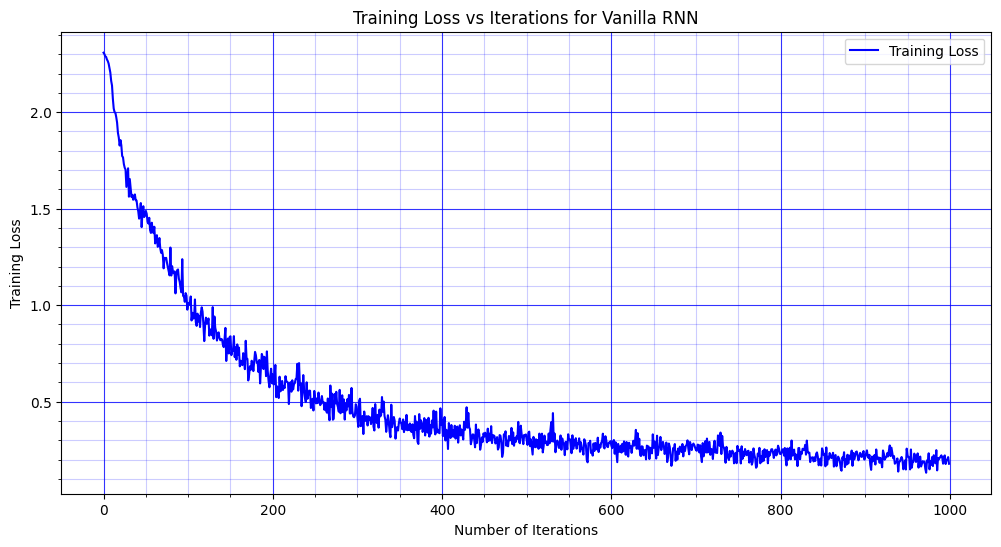

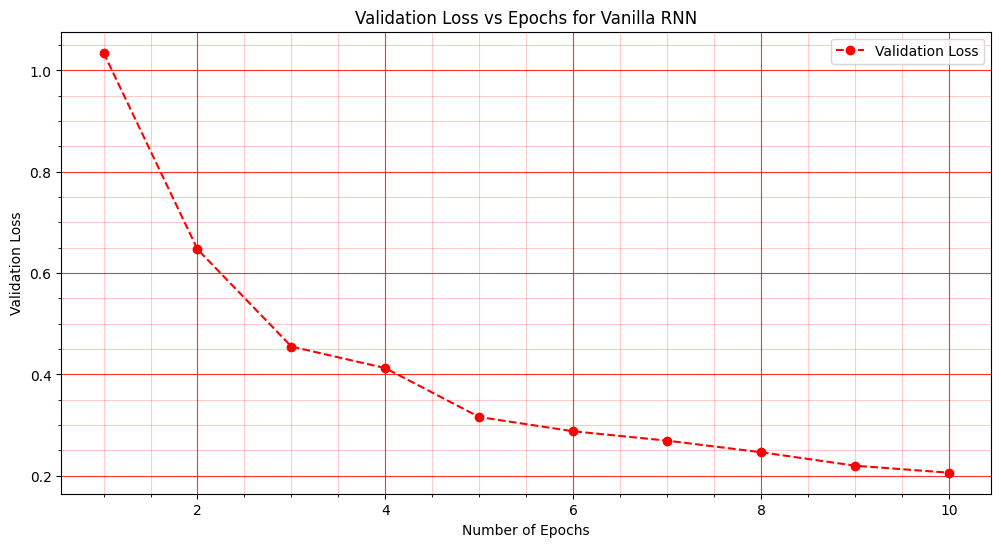

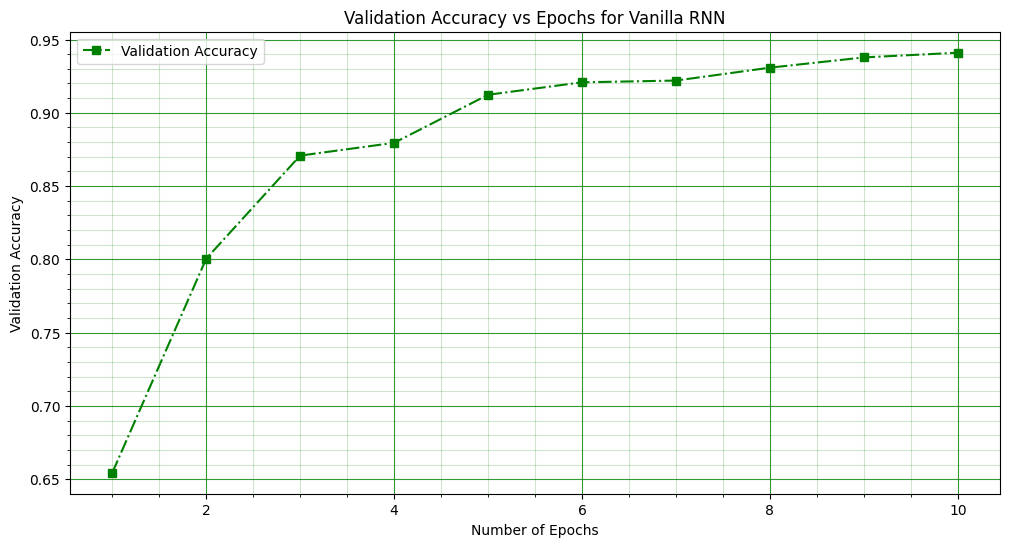

In [ ]:
plotter(train_loss,val_loss,val_acc,"Vanilla RNN")

In [ ]:
model1.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testloader:
      images = images.reshape(-1, 28, 28)
      outputs = model1(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

    print('Test Accuracy of the vanilla RNN model: {:.3f} %'.format((correct / total) * 100))

Test Accuracy of the vanilla RNN model: 94.420 %


###**LSTM**

In [ ]:
class LSTM(nn.Module):
  def __init__(self):
    super(LSTM, self).__init__()
    self.lstm = nn.LSTM(28,128)
    self.layer2 = nn.Linear(128, 10)

  def forward(self, X):
    hiddenstate=torch.zeros(1,X.size(0),128)
    cellstate=torch.zeros(1,X.size(0),128)
    X=X.permute(1,0,2)
    out,(hs,cs) = self.lstm(X,(hiddenstate,cellstate))
    out = self.layer2(out[27])
    return out.reshape(500,10)

In [ ]:
learning_rate = 0.001
epochs = 10
criterion2 = nn.CrossEntropyLoss()

In [ ]:
# LSTM model (without Regularization)
train_loss = []
val_loss = []
val_acc = []

model2 = LSTM()
optimizer2 = torch.optim.Adam(model2.parameters(), lr=learning_rate)

for epoch in range(epochs):
    # Training phase
    model2.train()  # Set the model to training mode
    for i, (images, labels) in enumerate(trainloader):
        images = images.reshape(-1, 28, 28)  # Reshape the images for LSTM input
        outputs = model2(images)
        loss = criterion2(outputs, labels)
        train_loss.append(loss.item())

        optimizer2.zero_grad()  # Zero the gradients
        loss.backward()         # Backpropagate the error
        optimizer2.step()       # Update the model weights

    # Validation phase
    model2.eval()  # Set the model to evaluation mode (no gradient calculation)
    tempvalloss = 0
    correctval = 0
    iteration = 0

    with torch.no_grad():  # No need to compute gradients for validation
        for images, labels in valloader:
            images = images.reshape(-1, 28, 28)  # Reshape the images for LSTM input
            outputs = model2(images)
            loss = criterion2(outputs, labels)
            _, predicted = torch.max(outputs.data, 1)  # Get predicted class
            correctval += (predicted == labels).sum().item()  # Count correct predictions
            iteration += 1
            tempvalloss += loss.item()  # Accumulate the validation loss

    # Append average validation loss and accuracy for each epoch
    val_loss.append(tempvalloss / iteration)
    val_acc.append(correctval / len(valloader.dataset))  # Validation accuracy

    # Print the training and validation loss/accuracy for each epoch
    print(f"Epoch [{epoch+1}/{epochs}] - "
          f"Training Loss: {train_loss[-1]:.4f}, "
          f"Validation Loss: {val_loss[-1]:.4f}, "
          f"Validation Accuracy: {val_acc[-1]*100:.2f}%")


Epoch [1/10] - Training Loss: 0.5086, Validation Loss: 0.4967, Validation Accuracy: 84.95%
Epoch [2/10] - Training Loss: 0.2827, Validation Loss: 0.2767, Validation Accuracy: 91.68%
Epoch [3/10] - Training Loss: 0.2040, Validation Loss: 0.1911, Validation Accuracy: 94.42%
Epoch [4/10] - Training Loss: 0.1594, Validation Loss: 0.1566, Validation Accuracy: 95.42%
Epoch [5/10] - Training Loss: 0.1320, Validation Loss: 0.1504, Validation Accuracy: 95.44%
Epoch [6/10] - Training Loss: 0.1147, Validation Loss: 0.1367, Validation Accuracy: 96.03%
Epoch [7/10] - Training Loss: 0.1075, Validation Loss: 0.1204, Validation Accuracy: 96.53%
Epoch [8/10] - Training Loss: 0.1162, Validation Loss: 0.1277, Validation Accuracy: 96.24%
Epoch [9/10] - Training Loss: 0.0803, Validation Loss: 0.1128, Validation Accuracy: 96.76%
Epoch [10/10] - Training Loss: 0.0719, Validation Loss: 0.1062, Validation Accuracy: 96.85%


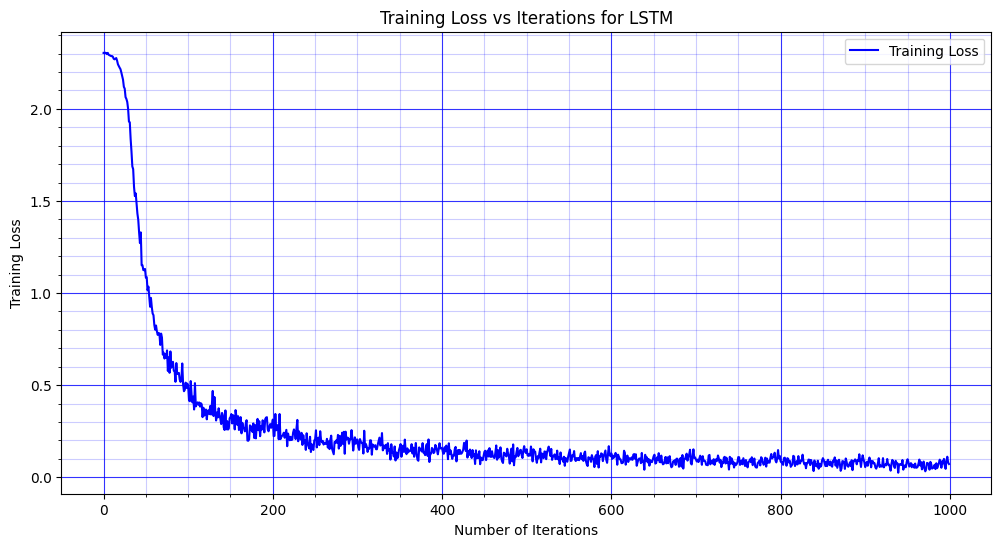

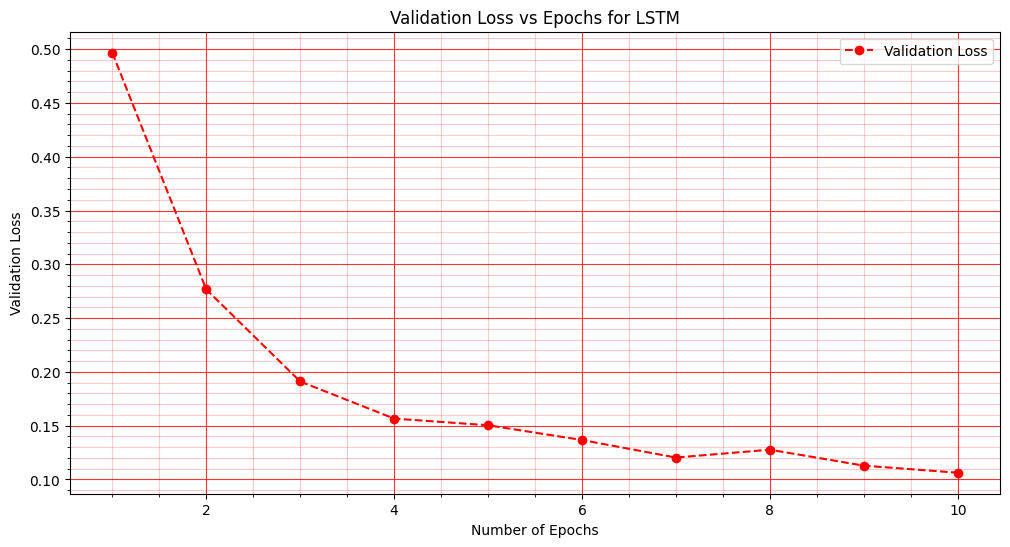

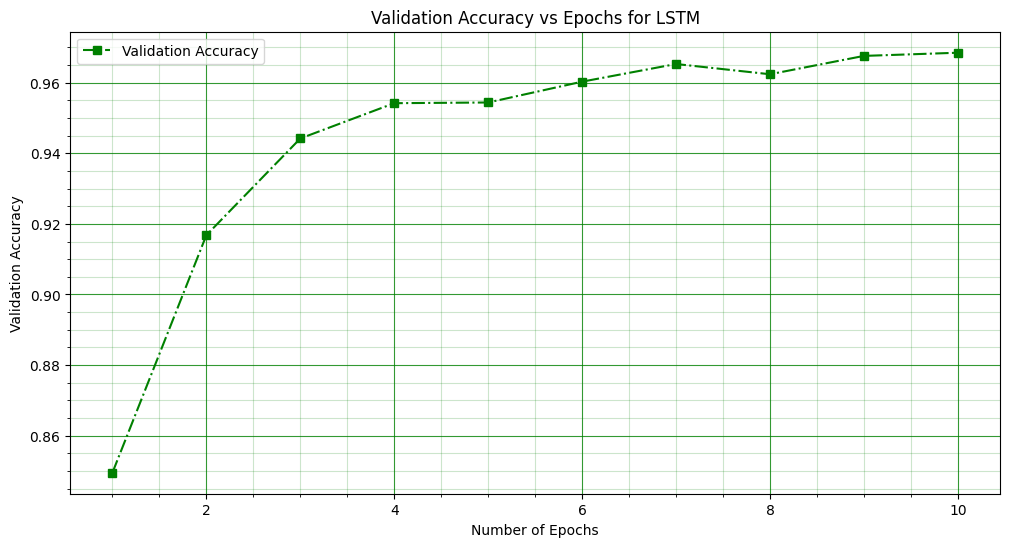

In [ ]:
plotter(train_loss,val_loss,val_acc,"LSTM")

In [ ]:
model2.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testloader:
      images = images.reshape(-1, 28, 28)
      outputs = model2(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

    print('Test Accuracy of LSTM model: {} %'.format((correct / total) * 100))

Test Accuracy of LSTM model: 97.38 %


###**GRU**

In [ ]:
class GRU(nn.Module):
    def __init__(self):
        super(GRU, self).__init__()
        self.gru = nn.GRU(28, 128)  # GRU with input size 28 and hidden size 128
        self.layer2 = nn.Linear(128, 10)  # Fully connected layer for classification

    def forward(self, X):
        hidden_state = torch.zeros(1, X.size(0), 128)  # Initialize hidden state for GRU
        X = X.permute(1, 0, 2)  # Reshape input to (sequence_length, batch_size, input_size)

        out, hidden_state = self.gru(X, hidden_state)  # Pass through GRU layer
        out = self.layer2(out[-1])  # Use the last time step's output
        return out.reshape(500, 10)  # Reshape to (batch_size, num_classes)


In [ ]:
learning_rate = 0.001
epochs = 10
criterion5 = nn.CrossEntropyLoss()

In [ ]:
# GRU model (without Regularization)
train_loss = []
val_loss = []
val_acc = []

model5 = GRU()
optimizer5 = torch.optim.Adam(model5.parameters(), lr=learning_rate)

for epoch in range(epochs):
    # Training phase
    model5.train()  # Set the model to training mode
    for i, (images, labels) in enumerate(trainloader):
        images = images.reshape(-1, 28, 28)  # Reshape the images for LSTM input
        outputs = model5(images)
        loss = criterion5(outputs, labels)
        train_loss.append(loss.item())

        optimizer5.zero_grad()  # Zero the gradients
        loss.backward()         # Backpropagate the error
        optimizer5.step()       # Update the model weights

    # Validation phase
    model5.eval()  # Set the model to evaluation mode (no gradient calculation)
    tempvalloss = 0
    correctval = 0
    iteration = 0

    with torch.no_grad():  # No need to compute gradients for validation
        for images, labels in valloader:
            images = images.reshape(-1, 28, 28)  # Reshape the images for LSTM input
            outputs = model5(images)
            loss = criterion5(outputs, labels)
            _, predicted = torch.max(outputs.data, 1)  # Get predicted class
            correctval += (predicted == labels).sum().item()  # Count correct predictions
            iteration += 1
            tempvalloss += loss.item()  # Accumulate the validation loss

    # Append average validation loss and accuracy for each epoch
    val_loss.append(tempvalloss / iteration)
    val_acc.append(correctval / len(valloader.dataset))  # Validation accuracy

    # Print the training and validation loss/accuracy for each epoch
    print(f"Epoch [{epoch+1}/{epochs}] - "
          f"Training Loss: {train_loss[-1]:.4f}, "
          f"Validation Loss: {val_loss[-1]:.4f}, "
          f"Validation Accuracy: {val_acc[-1]*100:.2f}%")


Epoch [1/10] - Training Loss: 0.8021, Validation Loss: 0.7963, Validation Accuracy: 74.10%
Epoch [2/10] - Training Loss: 0.4903, Validation Loss: 0.4317, Validation Accuracy: 86.59%
Epoch [3/10] - Training Loss: 0.3695, Validation Loss: 0.3166, Validation Accuracy: 90.40%
Epoch [4/10] - Training Loss: 0.2871, Validation Loss: 0.2599, Validation Accuracy: 92.24%
Epoch [5/10] - Training Loss: 0.2330, Validation Loss: 0.2058, Validation Accuracy: 94.22%
Epoch [6/10] - Training Loss: 0.2004, Validation Loss: 0.1744, Validation Accuracy: 95.27%
Epoch [7/10] - Training Loss: 0.1618, Validation Loss: 0.1521, Validation Accuracy: 95.86%
Epoch [8/10] - Training Loss: 0.1332, Validation Loss: 0.1364, Validation Accuracy: 96.29%
Epoch [9/10] - Training Loss: 0.1165, Validation Loss: 0.1302, Validation Accuracy: 96.48%
Epoch [10/10] - Training Loss: 0.1017, Validation Loss: 0.1189, Validation Accuracy: 96.67%


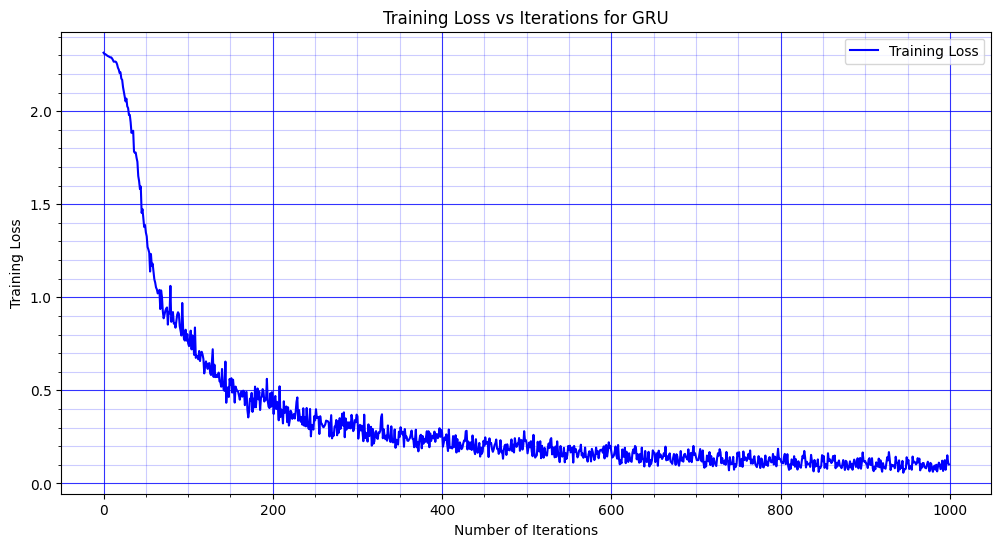

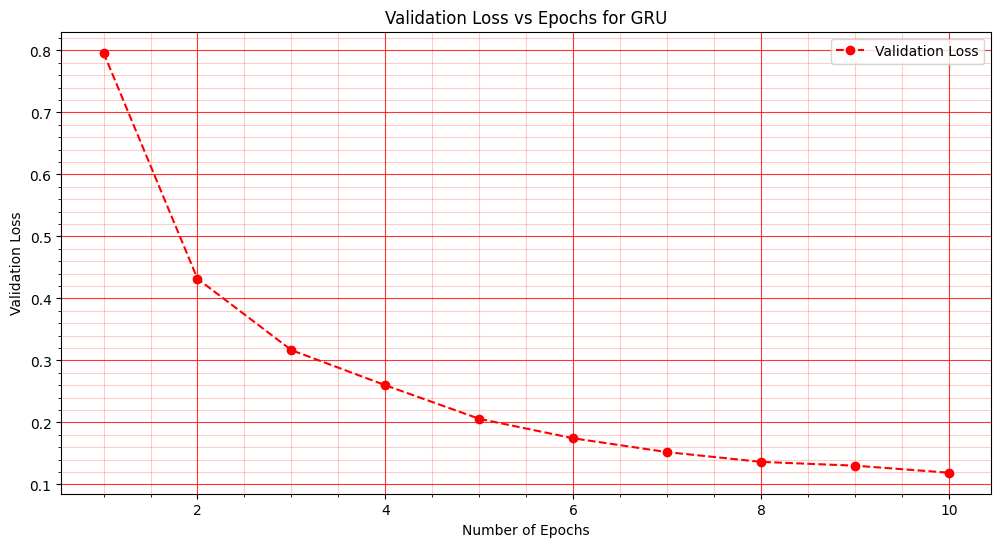

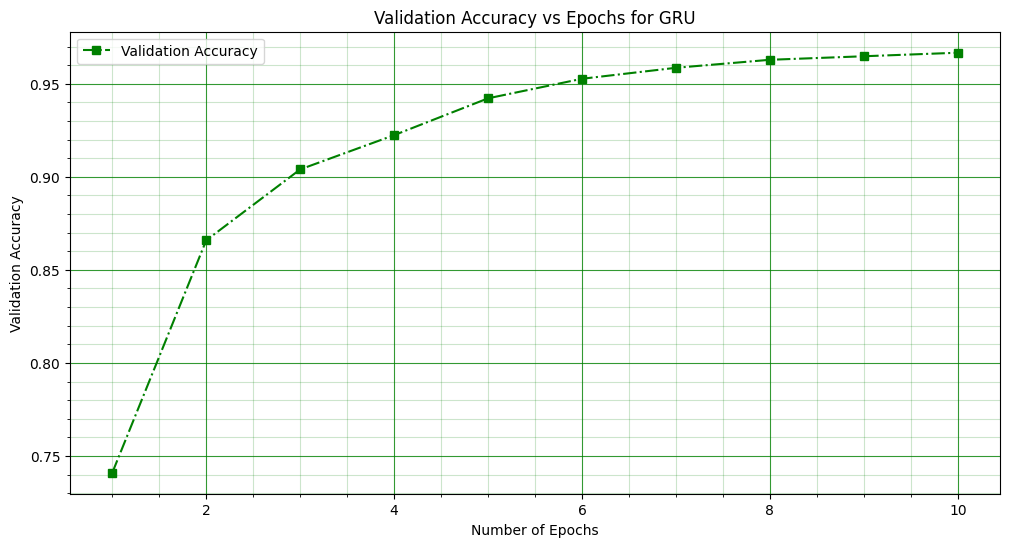

In [ ]:
plotter(train_loss,val_loss,val_acc,"GRU")

In [ ]:
model5.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testloader:
      images = images.reshape(-1, 28, 28)
      outputs = model5(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

    print('Test Accuracy of GRU model: {} %'.format((correct / total) * 100))

Test Accuracy of GRU model: 97.06 %


###**Bidirectional RNN**

In [ ]:
class Bi_RNN(nn.Module):
  def __init__(self):
    super(Bi_RNN, self).__init__()
    self.rnn = nn.RNN(28,128,1,bidirectional=True)
    self.layer2 = nn.Linear(128*2, 10)

  def forward(self, X):
    X = X.permute(1, 0, 2)
    hiddenlayer=torch.zeros(2,X.size(1),128)
    _,hiddenlayer = self.rnn(X,hiddenlayer)
    finp,binp=hiddenlayer[0],hiddenlayer[1]
    inp=torch.cat((finp,binp),dim=-1)
    out = self.layer2(inp)
    return out

In [ ]:
learning_rate = 0.001
epochs = 10
criterion3 = nn.CrossEntropyLoss()

In [ ]:
# Bi-directional RNN model (without Regularization)
train_loss = []
val_loss = []
val_acc = []

model3 = Bi_RNN()
optimizer3 = torch.optim.Adam(model3.parameters(), lr=learning_rate)

for epoch in range(epochs):
    # Training phase
    model3.train()  # Set the model to training mode
    for i, (images, labels) in enumerate(trainloader):
        images = images.reshape(-1, 28, 28)  # Reshape the images for Bi-RNN input
        outputs = model3(images)
        loss = criterion3(outputs, labels)
        train_loss.append(loss.item())

        optimizer3.zero_grad()  # Zero the gradients
        loss.backward()         # Backpropagate the error
        optimizer3.step()       # Update the model weights

    # Validation phase
    model3.eval()  # Set the model to evaluation mode (no gradient calculation)
    tempvalloss = 0
    correctval = 0
    iteration = 0

    with torch.no_grad():  # No need to compute gradients for validation
        for images, labels in valloader:
            images = images.reshape(-1, 28, 28)  # Reshape the images for Bi-RNN input
            outputs = model3(images)
            loss = criterion3(outputs, labels)
            _, predicted = torch.max(outputs.data, 1)  # Get predicted class
            correctval += (predicted == labels).sum().item()  # Count correct predictions
            iteration += 1
            tempvalloss += loss.item()  # Accumulate the validation loss

    # Append average validation loss and accuracy for each epoch
    val_loss.append(tempvalloss / iteration)
    val_acc.append(correctval / len(valloader.dataset))  # Validation accuracy

    # Print the training and validation loss/accuracy for each epoch
    print(f"Epoch [{epoch+1}/{epochs}] - "
          f"Training Loss: {train_loss[-1]:.4f}, "
          f"Validation Loss: {val_loss[-1]:.4f}, "
          f"Validation Accuracy: {val_acc[-1]*100:.2f}%")


Epoch [1/10] - Training Loss: 0.8201, Validation Loss: 0.8502, Validation Accuracy: 71.09%
Epoch [2/10] - Training Loss: 0.5688, Validation Loss: 0.5761, Validation Accuracy: 80.69%
Epoch [3/10] - Training Loss: 0.4706, Validation Loss: 0.4646, Validation Accuracy: 85.33%
Epoch [4/10] - Training Loss: 0.3528, Validation Loss: 0.3314, Validation Accuracy: 90.21%
Epoch [5/10] - Training Loss: 0.3066, Validation Loss: 0.2789, Validation Accuracy: 91.70%
Epoch [6/10] - Training Loss: 0.2640, Validation Loss: 0.2415, Validation Accuracy: 93.05%
Epoch [7/10] - Training Loss: 0.2294, Validation Loss: 0.2228, Validation Accuracy: 93.55%
Epoch [8/10] - Training Loss: 0.2092, Validation Loss: 0.2012, Validation Accuracy: 94.17%
Epoch [9/10] - Training Loss: 0.1808, Validation Loss: 0.1774, Validation Accuracy: 95.03%
Epoch [10/10] - Training Loss: 0.1626, Validation Loss: 0.1641, Validation Accuracy: 95.36%


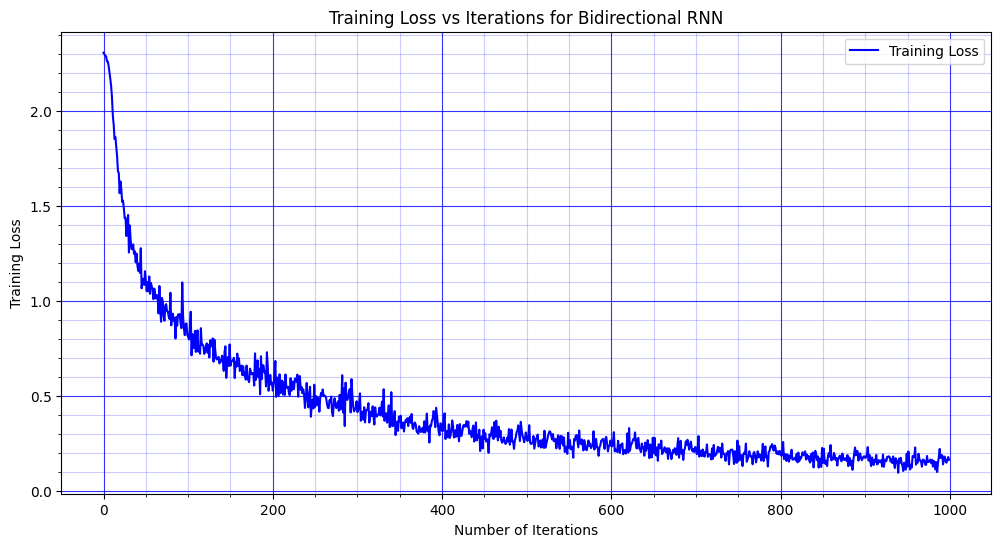

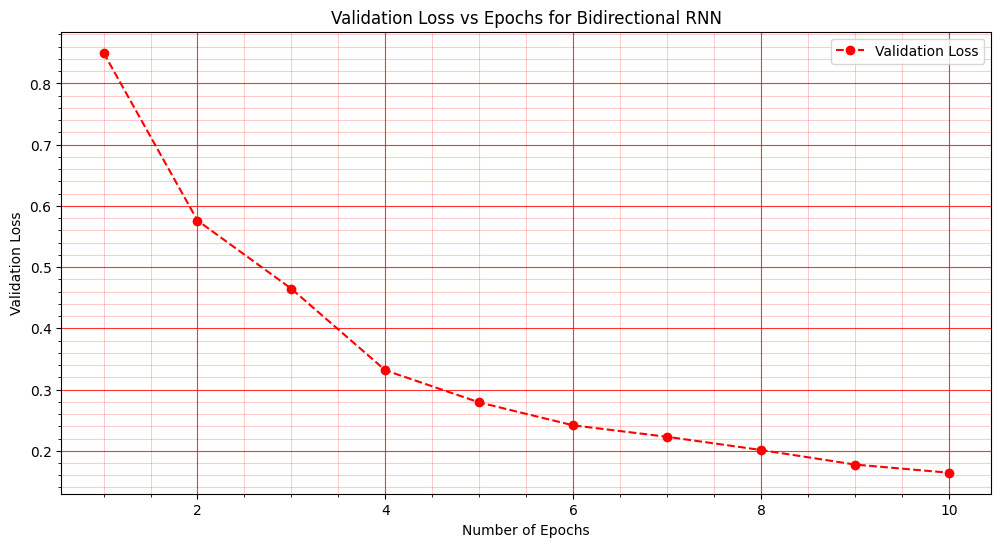

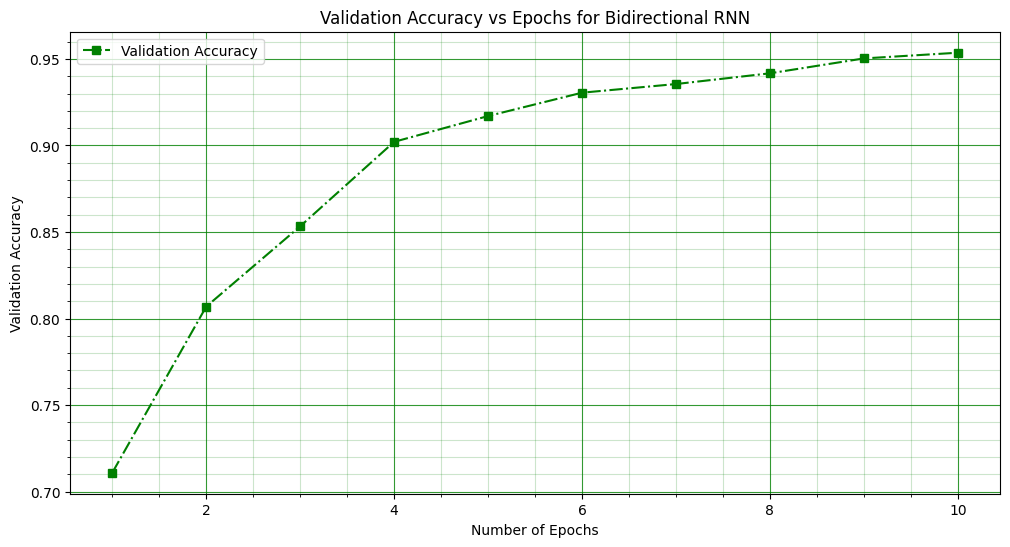

In [ ]:
plotter(train_loss,val_loss,val_acc, "Bidirectional RNN")

In [ ]:
model3.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testloader:
      # print(images.shape)
      images = images.reshape(-1, 28, 28)
      outputs = model3(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

    print('Test Accuracy of Bidirectional RNN model: {} %'.format((correct / total) * 100))

Test Accuracy of Bidirectional RNN model: 95.6 %


###**Bidirectional LSTM**

In [3]:
import torch
import torch.nn as nn

class Bi_LSTM(nn.Module):
    def __init__(self):
        super(Bi_LSTM, self).__init__()
        self.lstm = nn.LSTM(28, 128, 1, bidirectional=True)
        self.layer2 = nn.Linear(128 * 2, 10)

    def forward(self, X):
        X = X.permute(1, 0, 2)  # Reshape for LSTM: (sequence_length, batch_size, input_size)
        hidden_layer = (torch.zeros(2, X.size(1), 128), torch.zeros(2, X.size(1), 128))  # Initialize hidden and cell states
        _, (hidden_state, _) = self.lstm(X, hidden_layer)  # LSTM returns (output, (hidden_state, cell_state))

        # Separate forward and backward hidden states and concatenate
        forward_hidden = hidden_state[0]
        backward_hidden = hidden_state[1]
        combined_hidden = torch.cat((forward_hidden, backward_hidden), dim=-1)  # Concatenate along feature dimension

        out = self.layer2(combined_hidden)  # Final fully connected layer
        return out

In [4]:
learning_rate = 0.001
epochs = 10
criterion4 = nn.CrossEntropyLoss()

In [5]:
# Bi-directional LSTM model (without Regularization)
train_loss = []
val_loss = []
val_acc = []

model4 = Bi_LSTM()
optimizer4 = torch.optim.Adam(model4.parameters(), lr=learning_rate)

for epoch in range(epochs):
    # Training phase
    model4.train()  # Set the model to training mode
    for i, (images, labels) in enumerate(trainloader):
        images = images.reshape(-1, 28, 28)  # Reshape the images for Bi-RNN input
        outputs = model4(images)
        loss = criterion4(outputs, labels)
        train_loss.append(loss.item())

        optimizer4.zero_grad()  # Zero the gradients
        loss.backward()         # Backpropagate the error
        optimizer4.step()       # Update the model weights

    # Validation phase
    model4.eval()  # Set the model to evaluation mode (no gradient calculation)
    tempvalloss = 0
    correctval = 0
    iteration = 0

    with torch.no_grad():  # No need to compute gradients for validation
        for images, labels in valloader:
            images = images.reshape(-1, 28, 28)  # Reshape the images for Bi-RNN input
            outputs = model4(images)
            loss = criterion4(outputs, labels)
            _, predicted = torch.max(outputs.data, 1)  # Get predicted class
            correctval += (predicted == labels).sum().item()  # Count correct predictions
            iteration += 1
            tempvalloss += loss.item()  # Accumulate the validation loss

    # Append average validation loss and accuracy for each epoch
    val_loss.append(tempvalloss / iteration)
    val_acc.append(correctval / len(valloader.dataset))  # Validation accuracy

    # Print the training and validation loss/accuracy for each epoch
    print(f"Epoch [{epoch+1}/{epochs}] - "
          f"Training Loss: {train_loss[-1]:.4f}, "
          f"Validation Loss: {val_loss[-1]:.4f}, "
          f"Validation Accuracy: {val_acc[-1]*100:.2f}%")

Epoch [1/10] - Training Loss: 0.5379, Validation Loss: 0.4969, Validation Accuracy: 84.75%
Epoch [2/10] - Training Loss: 0.2326, Validation Loss: 0.2582, Validation Accuracy: 92.21%
Epoch [3/10] - Training Loss: 0.1626, Validation Loss: 0.1837, Validation Accuracy: 94.38%
Epoch [4/10] - Training Loss: 0.1242, Validation Loss: 0.1514, Validation Accuracy: 95.26%
Epoch [5/10] - Training Loss: 0.1187, Validation Loss: 0.1188, Validation Accuracy: 96.35%
Epoch [6/10] - Training Loss: 0.1040, Validation Loss: 0.1025, Validation Accuracy: 96.90%
Epoch [7/10] - Training Loss: 0.0817, Validation Loss: 0.0965, Validation Accuracy: 97.11%
Epoch [8/10] - Training Loss: 0.0723, Validation Loss: 0.0864, Validation Accuracy: 97.44%
Epoch [9/10] - Training Loss: 0.0585, Validation Loss: 0.0846, Validation Accuracy: 97.55%
Epoch [10/10] - Training Loss: 0.0476, Validation Loss: 0.0852, Validation Accuracy: 97.45%


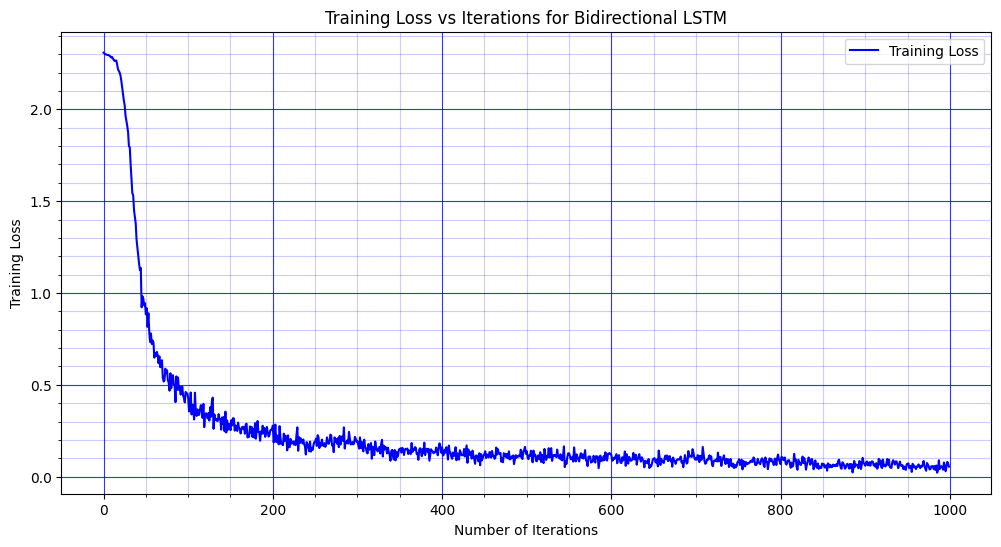

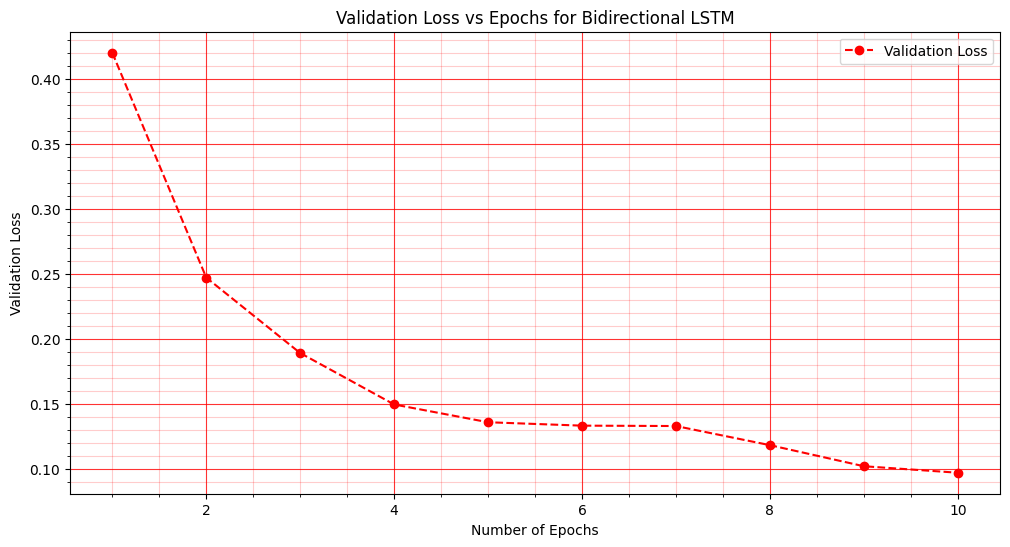

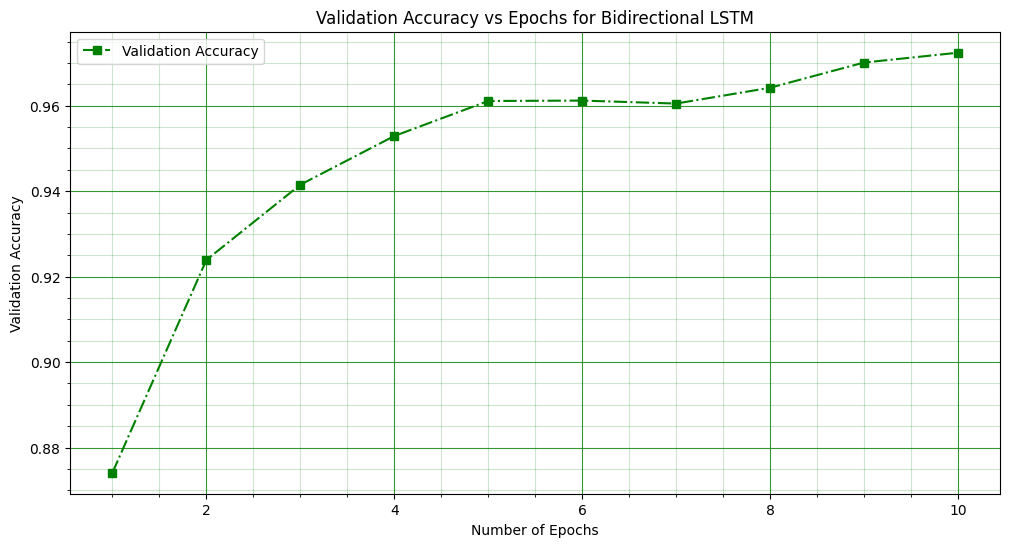

In [ ]:
plotter(train_loss,val_loss,val_acc, "Bidirectional LSTM")

In [ ]:
model4.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testloader:
      # print(images.shape)
      images = images.reshape(-1, 28, 28)
      outputs = model4(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

    print('Test Accuracy of Bidirectional LSTM model: {} %'.format((correct / total) * 100))

Test Accuracy of Bidirectional LSTM model: 97.82 %


##**Vanilla RNN (No. of Neurons/layer = 256)**

In [15]:
class RNN(nn.Module):
  def __init__(self):
    super(RNN, self).__init__()
    self.rnn = nn.RNN(28,256)
    self.layer2 = nn.Linear(256, 10)

  def forward(self, X):
    X = X.permute(1, 0, 2)
    hiddenlayer=torch.zeros(1,X.size(1),256)
    _,hiddenlayer = self.rnn(X,hiddenlayer)
    out = self.layer2(hiddenlayer)
    return out.reshape(500,10)

In [16]:
#Vanilla RNN model (without Regularization)
train_loss = []
val_loss = []
val_acc = []

model1 = RNN()
optimizer1 = torch.optim.Adam(model1.parameters(), lr=learning_rate)

for epoch in range(epochs):
    # Training phase
    model1.train()  # Set the model to training mode
    for i, (images, labels) in enumerate(trainloader):
        images = images.reshape(-1, 28, 28)  # Reshape the images for RNN input
        outputs = model1(images)
        loss = criterion1(outputs, labels)
        train_loss.append(loss.item())

        optimizer1.zero_grad()  # Zero the gradients
        loss.backward()         # Backpropagate the error
        optimizer1.step()       # Update the model weights

    # Validation phase
    model1.eval()  # Set the model to evaluation mode (no gradient calculation)
    tempvalloss = 0
    correctval = 0
    iteration = 0

    with torch.no_grad():  # No need to compute gradients for validation
        for images, labels in valloader:
            images = images.reshape(-1, 28, 28)  # Reshape the images for RNN input
            outputs = model1(images)
            loss = criterion1(outputs, labels)
            _, predicted = torch.max(outputs.data, 1)  # Get predicted class
            correctval += (predicted == labels).sum().item()  # Count correct predictions
            iteration += 1
            tempvalloss += loss.item()  # Accumulate the validation loss

    val_loss.append(tempvalloss / iteration)  # Average validation loss
    val_acc.append(correctval / len(valloader.dataset))  # Validation accuracy

    # Print the training and validation loss/accuracy for each epoch
    print(f"Epoch [{epoch+1}/{epochs}] - "
          f"Training Loss: {train_loss[-1]:.4f}, "
          f"Validation Loss: {val_loss[-1]:.4f}, "
          f"Validation Accuracy: {val_acc[-1]*100:.2f}%")


Epoch [1/10] - Training Loss: 0.6387, Validation Loss: 0.7134, Validation Accuracy: 77.97%
Epoch [2/10] - Training Loss: 0.3756, Validation Loss: 0.4492, Validation Accuracy: 86.26%
Epoch [3/10] - Training Loss: 0.2951, Validation Loss: 0.3660, Validation Accuracy: 89.23%
Epoch [4/10] - Training Loss: 0.2232, Validation Loss: 0.2889, Validation Accuracy: 91.35%
Epoch [5/10] - Training Loss: 0.2717, Validation Loss: 0.2646, Validation Accuracy: 92.04%
Epoch [6/10] - Training Loss: 0.1661, Validation Loss: 0.2608, Validation Accuracy: 92.23%
Epoch [7/10] - Training Loss: 0.1478, Validation Loss: 0.2275, Validation Accuracy: 93.22%
Epoch [8/10] - Training Loss: 0.1822, Validation Loss: 0.2172, Validation Accuracy: 93.72%
Epoch [9/10] - Training Loss: 0.1478, Validation Loss: 0.2078, Validation Accuracy: 94.15%
Epoch [10/10] - Training Loss: 0.1324, Validation Loss: 0.2061, Validation Accuracy: 94.07%


In [17]:
import matplotlib.pyplot as plt
import numpy as np

def plotter(training_loss, validation_loss, validation_accuracy, model_type):
    # Training Loss vs Iterations Plot
    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(len(training_loss)), training_loss, color='blue', linestyle='-', markersize=6, label='Training Loss')
    plt.grid(True, which='major', color='blue', linestyle='-', alpha=0.8)  # Corrected grid argument
    plt.minorticks_on()
    plt.grid(True, which='minor', color='blue', linestyle='-', alpha=0.2)  # Corrected grid argument
    plt.xlabel('Number of Iterations')
    plt.ylabel('Training Loss')
    plt.title(f'Training Loss vs Iterations for {model_type}')
    plt.legend()

    # Validation Loss vs Epochs Plot
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, len(validation_loss) + 1), validation_loss, color='red', linestyle='--', marker='o', markersize=6, label='Validation Loss')
    plt.grid(True, which='major', color='red', linestyle='-', alpha=0.8)  # Corrected grid argument
    plt.minorticks_on()
    plt.grid(True, which='minor', color='red', linestyle='-', alpha=0.2)  # Corrected grid argument
    plt.xlabel('Number of Epochs')
    plt.ylabel('Validation Loss')
    plt.title(f'Validation Loss vs Epochs for {model_type}')
    plt.legend()

    # Validation Accuracy vs Epochs Plot
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, len(validation_accuracy) + 1), validation_accuracy, color='green', linestyle='-.', marker='s', markersize=6, label='Validation Accuracy')
    plt.grid(True, which='major', color='green', linestyle='-', alpha=0.8)  # Corrected grid argument
    plt.minorticks_on()
    plt.grid(True, which='minor', color='green', linestyle='-', alpha=0.2)  # Corrected grid argument
    plt.xlabel('Number of Epochs')
    plt.ylabel('Validation Accuracy')
    plt.title(f'Validation Accuracy vs Epochs for {model_type}')
    plt.legend()

    plt.show()

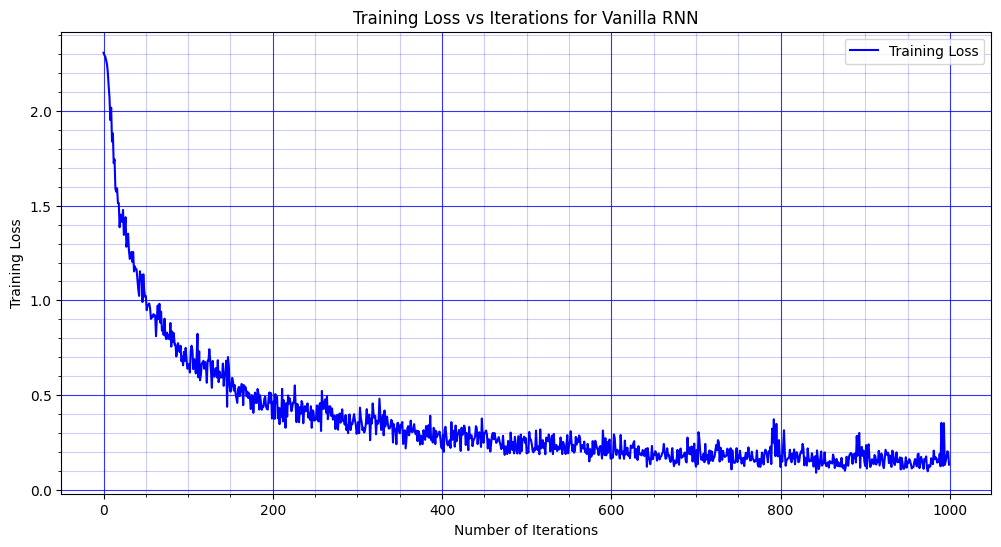

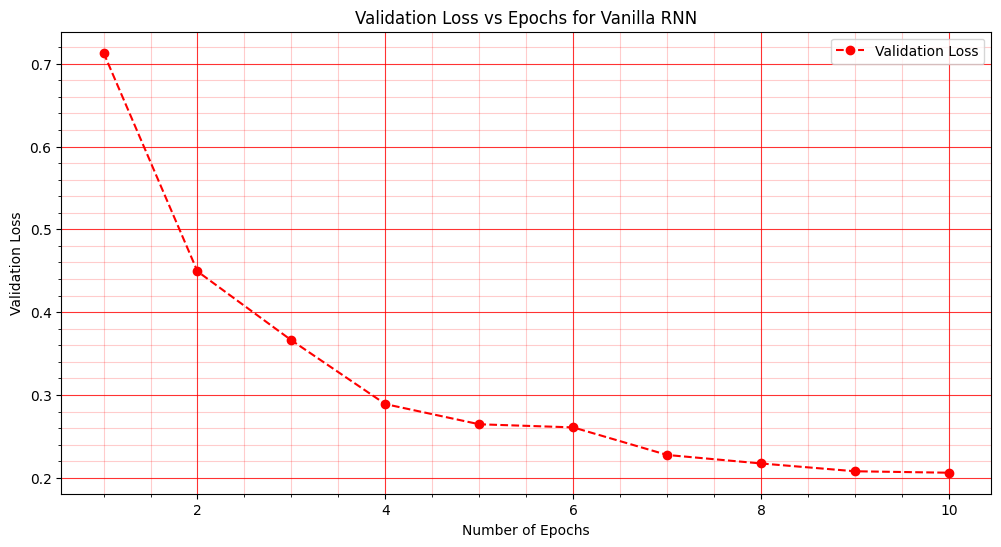

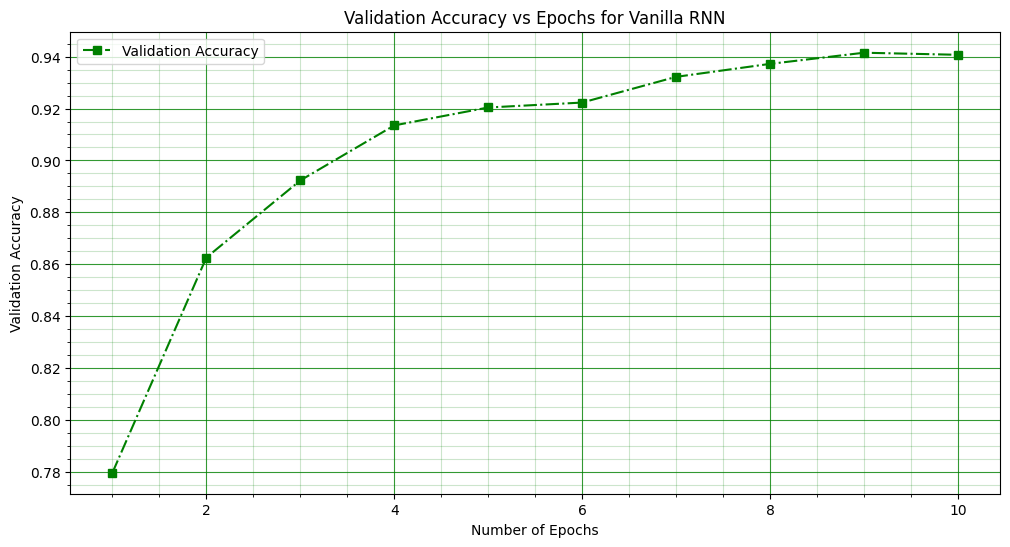

In [18]:
plotter(train_loss,val_loss,val_acc,"Vanilla RNN")

In [19]:
model1.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testloader:
      images = images.reshape(-1, 28, 28)
      outputs = model1(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

    print('Test Accuracy of the vanilla RNN model: {:.3f} %'.format((correct / total) * 100))

Test Accuracy of the vanilla RNN model: 94.860 %


##**Hyperparameters: Number of Layers = 2, Number of Neurons/layer = 128**

##**Vanilla RNN**

In [143]:
class RNN_2hidden_128(nn.Module):
    def __init__(self):
        super(RNN_2hidden_128, self).__init__()
        self.rnn = nn.RNN(input_size=28, hidden_size=128, num_layers=2)  # 2 hidden layers, 128 neurons per layer
        self.layer2 = nn.Linear(128, 10)  # Output layer with 10 classes

    def forward(self, X):
        X = X.permute(1, 0, 2)  # Permute to match RNN input shape (seq_len, batch_size, input_size)
        hiddenlayer = torch.zeros(2, X.size(1), 128)  # Initialize hidden state for 2 layers
        _, hiddenlayer = self.rnn(X, hiddenlayer)  # Pass through RNN
        out = self.layer2(hiddenlayer[-1])  # Use the last hidden state for classification
        return out

In [145]:
#Vanilla RNN model (without Regularization)
train_loss = []
val_loss = []
val_acc = []

model1 = RNN_2hidden_128()
optimizer1 = torch.optim.Adam(model1.parameters(), lr=learning_rate)

for epoch in range(epochs):
    # Training phase
    model1.train()  # Set the model to training mode
    for i, (images, labels) in enumerate(trainloader):
        images = images.reshape(-1, 28, 28)  # Reshape the images for RNN input
        outputs = model1(images)
        loss = criterion1(outputs, labels)
        train_loss.append(loss.item())

        optimizer1.zero_grad()  # Zero the gradients
        loss.backward()         # Backpropagate the error
        optimizer1.step()       # Update the model weights

    # Validation phase
    model1.eval()  # Set the model to evaluation mode (no gradient calculation)
    tempvalloss = 0
    correctval = 0
    iteration = 0

    with torch.no_grad():  # No need to compute gradients for validation
        for images, labels in valloader:
            images = images.reshape(-1, 28, 28)  # Reshape the images for RNN input
            outputs = model1(images)
            loss = criterion1(outputs, labels)
            _, predicted = torch.max(outputs.data, 1)  # Get predicted class
            correctval += (predicted == labels).sum().item()  # Count correct predictions
            iteration += 1
            tempvalloss += loss.item()  # Accumulate the validation loss

    val_loss.append(tempvalloss / iteration)  # Average validation loss
    val_acc.append(correctval / len(valloader.dataset))  # Validation accuracy

    # Print the training and validation loss/accuracy for each epoch
    print(f"Epoch [{epoch+1}/{epochs}] - "
          f"Training Loss: {train_loss[-1]:.4f}, "
          f"Validation Loss: {val_loss[-1]:.4f}, "
          f"Validation Accuracy: {val_acc[-1]*100:.2f}%")


Epoch [1/10] - Training Loss: 0.6458, Validation Loss: 0.6418, Validation Accuracy: 78.76%
Epoch [2/10] - Training Loss: 0.4369, Validation Loss: 0.3879, Validation Accuracy: 88.15%
Epoch [3/10] - Training Loss: 0.2766, Validation Loss: 0.2482, Validation Accuracy: 92.68%
Epoch [4/10] - Training Loss: 0.2373, Validation Loss: 0.1928, Validation Accuracy: 94.60%
Epoch [5/10] - Training Loss: 0.2188, Validation Loss: 0.2096, Validation Accuracy: 93.78%
Epoch [6/10] - Training Loss: 0.1613, Validation Loss: 0.1589, Validation Accuracy: 95.27%
Epoch [7/10] - Training Loss: 0.1527, Validation Loss: 0.1333, Validation Accuracy: 96.22%
Epoch [8/10] - Training Loss: 0.1217, Validation Loss: 0.1212, Validation Accuracy: 96.55%
Epoch [9/10] - Training Loss: 0.1145, Validation Loss: 0.1221, Validation Accuracy: 96.57%
Epoch [10/10] - Training Loss: 0.1103, Validation Loss: 0.1099, Validation Accuracy: 96.91%


In [146]:
import matplotlib.pyplot as plt
import numpy as np

def plotter(training_loss, validation_loss, validation_accuracy, model_type):
    # Training Loss vs Iterations Plot
    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(len(training_loss)), training_loss, color='blue', linestyle='-', markersize=6, label='Training Loss')
    plt.grid(True, which='major', color='blue', linestyle='-', alpha=0.8)  # Corrected grid argument
    plt.minorticks_on()
    plt.grid(True, which='minor', color='blue', linestyle='-', alpha=0.2)  # Corrected grid argument
    plt.xlabel('Number of Iterations')
    plt.ylabel('Training Loss')
    plt.title(f'Training Loss vs Iterations for {model_type}')
    plt.legend()

    # Validation Loss vs Epochs Plot
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, len(validation_loss) + 1), validation_loss, color='red', linestyle='--', marker='o', markersize=6, label='Validation Loss')
    plt.grid(True, which='major', color='red', linestyle='-', alpha=0.8)  # Corrected grid argument
    plt.minorticks_on()
    plt.grid(True, which='minor', color='red', linestyle='-', alpha=0.2)  # Corrected grid argument
    plt.xlabel('Number of Epochs')
    plt.ylabel('Validation Loss')
    plt.title(f'Validation Loss vs Epochs for {model_type}')
    plt.legend()

    # Validation Accuracy vs Epochs Plot
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, len(validation_accuracy) + 1), validation_accuracy, color='green', linestyle='-.', marker='s', markersize=6, label='Validation Accuracy')
    plt.grid(True, which='major', color='green', linestyle='-', alpha=0.8)  # Corrected grid argument
    plt.minorticks_on()
    plt.grid(True, which='minor', color='green', linestyle='-', alpha=0.2)  # Corrected grid argument
    plt.xlabel('Number of Epochs')
    plt.ylabel('Validation Accuracy')
    plt.title(f'Validation Accuracy vs Epochs for {model_type}')
    plt.legend()

    plt.show()

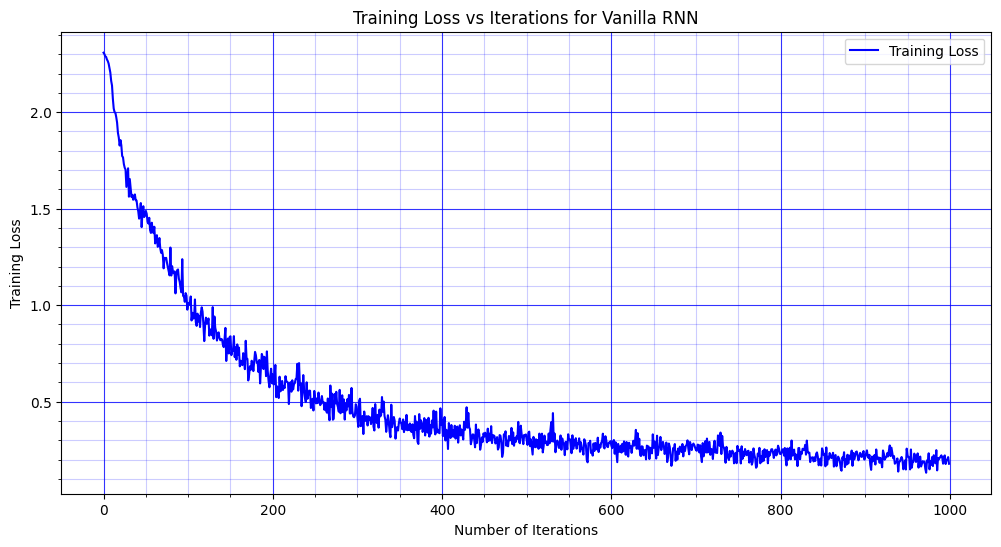

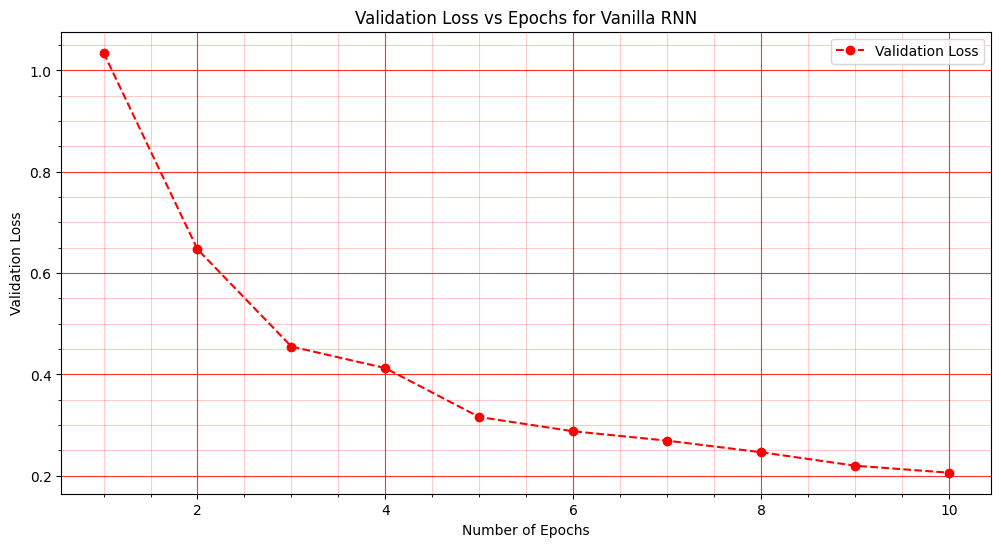

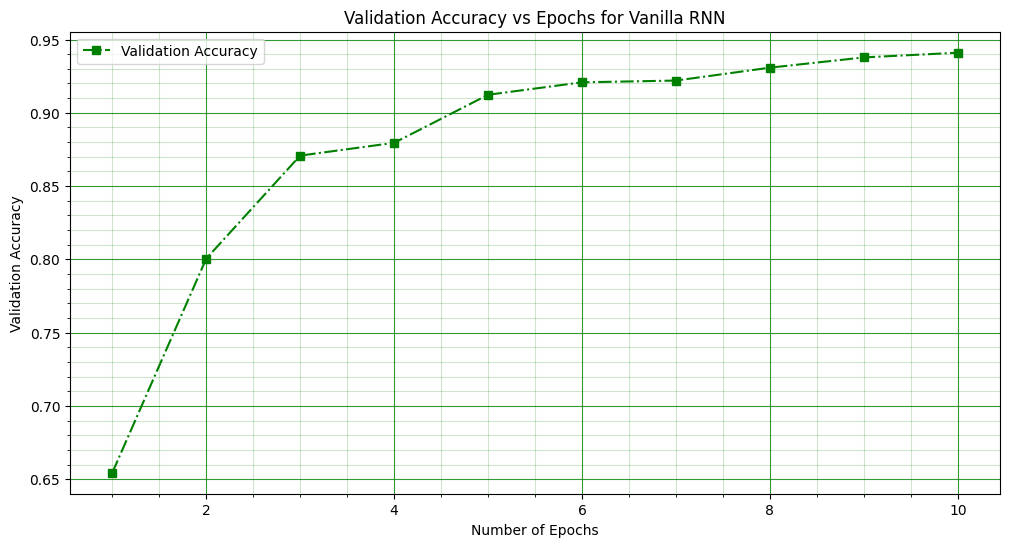

In [ ]:
plotter(train_loss,val_loss,val_acc,"Vanilla RNN_hid=2")

In [148]:
model1.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testloader:
      images = images.reshape(-1, 28, 28)
      outputs = model1(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

    print('Test Accuracy of the vanilla RNN model: {:.3f} %'.format((correct / total) * 100))

Test Accuracy of the vanilla RNN model: 96.830 %


###**Observations**

Model                   | Test Accuracy  |
------------------------|----------------|
Vanilla RNN(128)             | 94.42%         |
Vanilla RNN(256)             | 94.86 %        |
Vanilla RNN(128,hid=2)      |96.83 %         |
LSTM                     | 97.38%         |
GRU                      | 97.06%         |
Bidirectional RNN        | 95.60%         |
Bidirectional LSTM       | 97.82%         |


- LSTM and Bidirectional LSTM Perform Best: The Bidirectional LSTM model achieved the highest accuracy at 97.82%, followed closely by the LSTM model with 97.38%. This shows that both LSTM variants are highly effective at capturing dependencies in sequence data for MNIST classification.

- Increasing the number of hidden layers from 1 to 2 in the Vanilla RNN significantly improves performance, with accuracy increasing from 94.42% to 96.83% compared to increasing the number of neurons/layer from 128 to 256 with a single layer (94.42% -->94.86%)

- Bidirectional Models Outperform Regular RNNs: The Bidirectional RNN (95.60%) is noticeably better than the vanilla RNN (94.42%), suggesting that processing sequences in both forward and backward directions helps improve model performance, even with simpler RNNs.

- GRU Model Performance: The GRU model (97.06%) also performs almost as well as LSTM, demonstrating that GRUs can be a strong alternative to LSTMs, with slightly fewer computational demands due to their simpler architecture.

##**Checking model prediction for Random Test Samples**

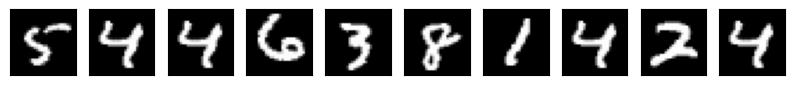

Predictions: [5. 4. 4. 6. 3. 8. 1. 4. 2. 4.]
Real Labels: [5. 4. 4. 6. 3. 8. 1. 4. 2. 4.]


In [ ]:
# Randomly select 5 images
a = (10 * np.abs(np.random.rand(10))).astype(int)

# Initialize prediction and actual label arrays
predict = np.zeros(10)
actual = np.zeros(10)

# Create a figure for visualization
fig, ax = plt.subplots(1, 10, figsize=(10, 5))

# Iterate over the selected images and display them
for ix, i in enumerate(a):
    ax[ix].set_xticks([])
    ax[ix].set_yticks([])
    im = ax[ix].imshow(images[i], cmap='gray')

    # Get the predicted label for the current image
    _, predicted = torch.max(model4(images)[i], 0)
    predict[ix] = predicted.item()

    # Get the actual label for the current image
    actual[ix] = labels[i]

# Show the plot
plt.show()

# Print prediction and real labels
print('Predictions:', predict)
print('Real Labels:', actual)


##**Checking model prediction for Custom Handwritten Samples**

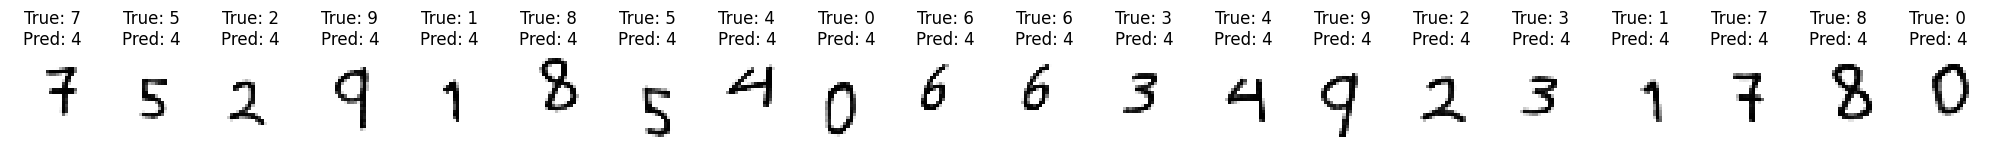

Predictions: [4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
Real Labels: [7. 5. 2. 9. 1. 8. 5. 4. 0. 6. 6. 3. 4. 9. 2. 3. 1. 7. 8. 0.]


In [14]:
import zipfile
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from PIL import Image
from torchvision import transforms

# Path to the zip file
zip_path = '/content/Handwritten_Digits.zip'
extract_path = '/content/Handwritten_Digits/Handwritten_Digits'

# Extract zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Get a list of image file paths
image_paths = [os.path.join(extract_path, f) for f in os.listdir(extract_path) if f.endswith('.png')]

# Initialize prediction and actual label arrays
predict = np.zeros(20)
actual = np.zeros(20)

# Define transformations for image loading
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Ensure grayscale
    transforms.ToTensor()  # Convert to tensor
])

# Initialize a figure for displaying images
fig, ax = plt.subplots(1, 20, figsize=(20, 2))

# Load and plot each image with true and predicted labels
for ix, image_path in enumerate(image_paths[:20]):  # Select the first 10 images
    # Open image and apply transformation
    image = Image.open(image_path)
    image_tensor = transform(image).squeeze(0)  # Remove channel dimension, shape becomes (28, 28)

    # Reshape to (sequence_length, batch_size, input_size)
    input_tensor = image_tensor.view(28, 1, 28)  # (sequence_length, batch_size, input_size)

    # Get the true label from the first character of the filename
    true_label = int(os.path.basename(image_path)[0])
    actual[ix] = true_label

    # Get the model's prediction
    with torch.no_grad():
        output = model4(input_tensor)  # Get output for each time step
        last_output = output[-1]       # Take the output from the last time step
        _, predicted = torch.max(last_output, 0)
        predict[ix] = predicted.item()

    # Display the image and labels
    ax[ix].imshow(image, cmap='gray')
    ax[ix].axis('off')
    ax[ix].set_title(f"True: {true_label}\nPred: {int(predict[ix])}")

# Show the plot
plt.tight_layout()
plt.show()

# Print predictions and real labels
print('Predictions:', predict)
print('Real Labels:', actual)



##**Observation**
- Model Overfitting or Limited Generalization: The model predicts nearly all custom handwritten digit images as "4," indicating it has not generalized well to new data that is outside the MNIST dataset. This behavior suggests possible overfitting to MNIST digits, as it fails to capture the diversity in custom handwriting styles.

- Potential Bias or Insufficient Training Variety: Consistently predicting the same label (in this case, "4") for all inputs could indicate a bias in the model or insufficient variability in the training data to accommodate different styles. It may benefit from further fine-tuning with more diverse samples, especially from sources other than MNIST, to handle variations in handwritten digits better.

#**2. Adding two binary strings**

**Data Preparation**

In [83]:
def bin_generator(L):
  N1=np.random.randint(0,2**(L-1))
  N2=np.random.randint(0,2**(L-1))
  S=N1+N2
  binlen=L
  B1=np.zeros((1,binlen))
  B2=np.zeros((1,binlen))
  B3=np.zeros((binlen))
  b=np.flip(np.array(list(np.binary_repr(N1)), dtype=int))
  B1[0][0:len(b)]=b[0:]
  b=np.flip(np.array(list(np.binary_repr(N2)), dtype=int))
  B2[0][0:len(b)]=b[0:]
  b=np.flip(np.array(list(np.binary_repr(S)), dtype=int))
  B3[0:len(b)]=b[0:]
  return(np.concatenate((np.transpose(B1),np.transpose(B2)),axis=1),B3)

In [85]:
train_X=[]
train_Y=[]
for i in range(250):
  L=np.random.randint(1,21)
  a,b=bin_generator(L)
  train_X.append(a)
  train_Y.append(b)

val_X=[]
val_Y=[]
for i in range(100):
  L=np.random.randint(1,21)
  a,b=bin_generator(L)
  val_X.append(a)
  val_Y.append(b)

test_X=[]
test_Y=[]
for j in range(1,21):
  for i in range(100):
    a,b=bin_generator(j)
    test_X.append(a)
    test_Y.append(b)

**Model**

In [86]:
class LSTM_2(nn.Module):
  def __init__(self,hidsize):
    super(LSTM_2, self).__init__()
    self.hidsize=hidsize
    self.lstm = nn.LSTM(2,hidsize)
    self.layer2 = nn.Sequential(
        nn.Linear(hidsize,1),
        nn.Sigmoid())

  def forward(self, X):
    X=X.permute(1,0,2)
    hiddenstate=torch.zeros(1,X.size(1),self.hidsize)
    cellstate=torch.zeros(1,X.size(1),self.hidsize)
    out,(hs,cs) = self.lstm(X,(hiddenstate,cellstate))
    out = self.layer2(out)
    return out.reshape(X.size(0))

**State Vector Size = 3 and 10**

In [87]:
learning_rate = 0.01
epochs = 10
criterion5 = nn.MSELoss()
model5_3=LSTM_2(3)#model51=model5_3
optimizer5_3 = torch.optim.Adam(model5_3.parameters(), lr=learning_rate)
model5_10=LSTM_2(10)#model52=model5_10
optimizer5_10 = torch.optim.Adam(model5_10.parameters(), lr=learning_rate)

In [88]:
train_loss_3 = []
val_loss_3 = []
val_acc_3 = []

for epoch in range(epochs):
    # Training loop
    for i in range(int(len(train_X))):
        a = torch.zeros((1, train_X[i].shape[0], train_X[i].shape[1]))
        a[0] = torch.from_numpy(train_X[i])
        output = model5_3(a.float())
        label = torch.tensor(np.transpose(train_Y[i]))

        # Calculate training loss and optimize
        loss = criterion5(output, label.float())
        train_loss_3.append(loss.item())

        optimizer5_3.zero_grad()
        loss.backward()
        optimizer5_3.step()

    # Validation loop
    temp_val_loss = 0
    correct_val = 0
    total_samples = 0

    for i in range(len(val_X)):
        a = torch.zeros((1, val_X[i].shape[0], val_X[i].shape[1]))
        a[0] = torch.from_numpy(val_X[i])

        # Get model output and calculate validation loss
        with torch.no_grad():  # Disable gradient computation for validation
            output = model5_3(a.float())
            label = torch.tensor(np.transpose(val_Y[i]))
            loss = criterion5(output, label.float())

        temp_val_loss += loss.item()

        # Compute validation accuracy
        predicted = torch.zeros(output.shape)
        predicted[output >= 0.5] = 1
        predicted[output < 0.5] = 0
        correct_val += (predicted == label.float()).sum().item()
        total_samples += label.numel()  # Count total elements for accuracy

    # Calculate average validation loss and accuracy
    avg_val_loss = temp_val_loss / len(val_X)
    avg_val_acc = 100 * correct_val / total_samples

    val_loss_3.append(avg_val_loss)
    val_acc_3.append(avg_val_acc)

    # Print training status
    print(f'Epoch [{epoch+1}/{epochs}] - Training Loss: {train_loss_3[-1]:.4f}, Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {avg_val_acc:.2f}%')


Epoch [1/10] - Training Loss: 0.2613, Validation Loss: 0.2352, Validation Accuracy: 47.89%
Epoch [2/10] - Training Loss: 0.2904, Validation Loss: 0.1888, Validation Accuracy: 68.57%
Epoch [3/10] - Training Loss: 0.1555, Validation Loss: 0.1590, Validation Accuracy: 70.78%
Epoch [4/10] - Training Loss: 0.0872, Validation Loss: 0.1131, Validation Accuracy: 89.86%
Epoch [5/10] - Training Loss: 0.0448, Validation Loss: 0.0827, Validation Accuracy: 91.47%
Epoch [6/10] - Training Loss: 0.0267, Validation Loss: 0.0693, Validation Accuracy: 91.77%
Epoch [7/10] - Training Loss: 0.0190, Validation Loss: 0.0640, Validation Accuracy: 91.77%
Epoch [8/10] - Training Loss: 0.0155, Validation Loss: 0.0613, Validation Accuracy: 91.87%
Epoch [9/10] - Training Loss: 0.0141, Validation Loss: 0.0597, Validation Accuracy: 91.87%
Epoch [10/10] - Training Loss: 0.0139, Validation Loss: 0.0585, Validation Accuracy: 91.87%


In [89]:
train_loss_10 = []
val_loss_10 = []
val_acc_10 = []

for epoch in range(epochs):
    # Training loop
    for i in range(int(len(train_X))):
        a = torch.zeros((1, train_X[i].shape[0], train_X[i].shape[1]))
        a[0] = torch.from_numpy(train_X[i])
        output = model5_10(a.float())
        label = torch.tensor(np.transpose(train_Y[i]))

        # Calculate training loss and optimize
        loss = criterion5(output, label.float())
        train_loss_10.append(loss.item())

        optimizer5_10.zero_grad()
        loss.backward()
        optimizer5_10.step()

    # Validation loop
    temp_val_loss = 0
    correct_val = 0
    total_samples = 0

    for i in range(len(val_X)):
        a = torch.zeros((1, val_X[i].shape[0], val_X[i].shape[1]))
        a[0] = torch.from_numpy(val_X[i])

        # Get model output and calculate validation loss
        with torch.no_grad():  # Disable gradient computation for validation
            output = model5_10(a.float())
            label = torch.tensor(np.transpose(val_Y[i]))
            loss = criterion5(output, label.float())

        temp_val_loss += loss.item()

        # Compute validation accuracy
        predicted = torch.zeros(output.shape)
        predicted[output >= 0.5] = 1
        predicted[output < 0.5] = 0
        correct_val += (predicted == label.float()).sum().item()
        total_samples += label.numel()  # Count total elements for accuracy

    # Calculate average validation loss and accuracy
    avg_val_loss = temp_val_loss / len(val_X)
    avg_val_acc = 100 * correct_val / total_samples

    val_loss_10.append(avg_val_loss)
    val_acc_10.append(avg_val_acc)

    # Print training status
    print(f'Epoch [{epoch+1}/{epochs}] - Training Loss: {train_loss_10[-1]:.4f}, Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {avg_val_acc:.2f}%')


Epoch [1/10] - Training Loss: 0.2461, Validation Loss: 0.2019, Validation Accuracy: 60.94%
Epoch [2/10] - Training Loss: 0.0297, Validation Loss: 0.0832, Validation Accuracy: 85.84%
Epoch [3/10] - Training Loss: 0.0126, Validation Loss: 0.0264, Validation Accuracy: 99.60%
Epoch [4/10] - Training Loss: 0.0059, Validation Loss: 0.0069, Validation Accuracy: 100.00%
Epoch [5/10] - Training Loss: 0.0028, Validation Loss: 0.0025, Validation Accuracy: 100.00%
Epoch [6/10] - Training Loss: 0.0016, Validation Loss: 0.0013, Validation Accuracy: 100.00%
Epoch [7/10] - Training Loss: 0.0011, Validation Loss: 0.0008, Validation Accuracy: 100.00%
Epoch [8/10] - Training Loss: 0.0007, Validation Loss: 0.0005, Validation Accuracy: 100.00%
Epoch [9/10] - Training Loss: 0.0005, Validation Loss: 0.0003, Validation Accuracy: 100.00%
Epoch [10/10] - Training Loss: 0.0004, Validation Loss: 0.0002, Validation Accuracy: 100.00%


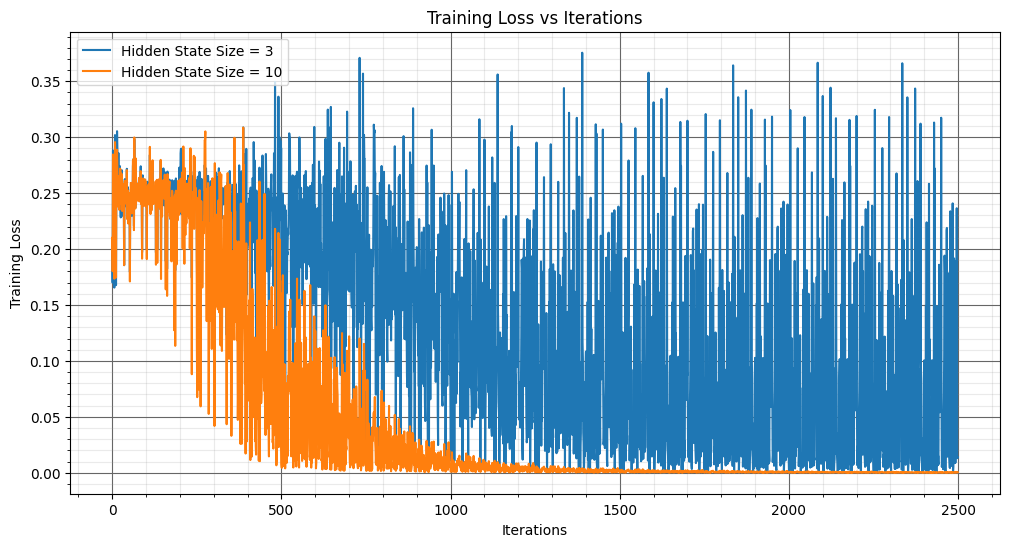

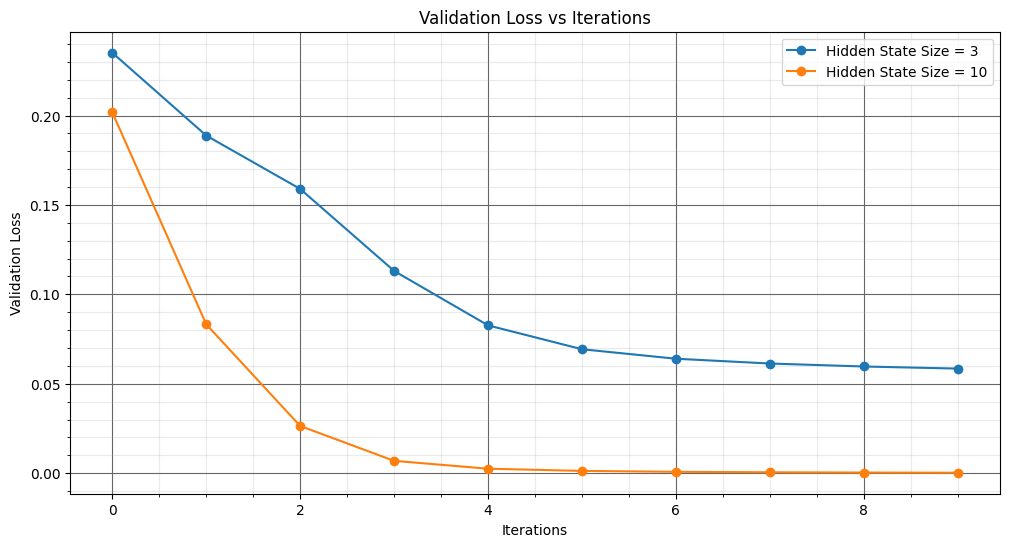

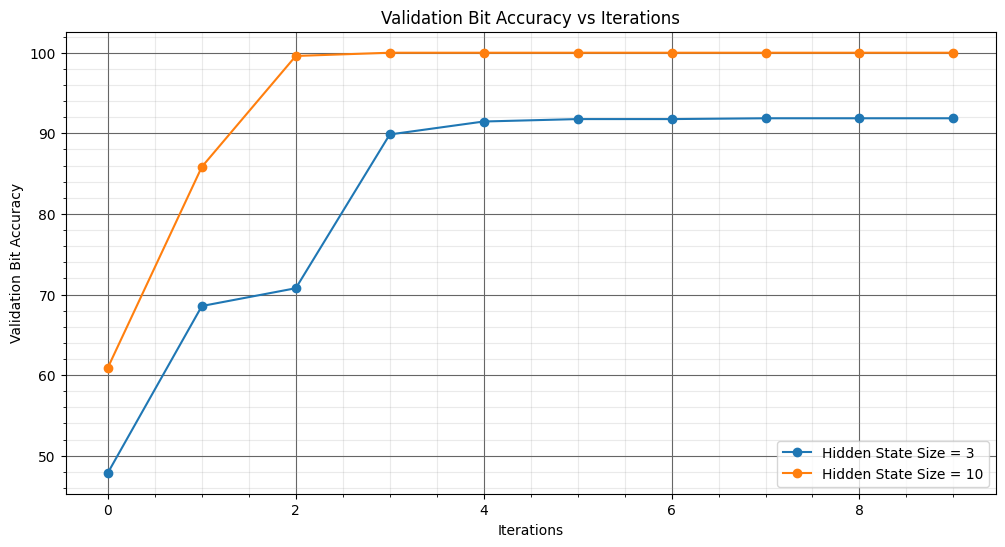

In [90]:
plt.figure(figsize=(12, 6))
xtrainloss = np.arange(len(train_loss_3))
plt.plot(xtrainloss, train_loss_3, label="Hidden State Size = 3")
plt.plot(xtrainloss, train_loss_10, label="Hidden State Size = 10")
plt.grid(which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Iterations')
plt.legend()

plt.figure(figsize=(12, 6))
xtestloss = np.arange(len(val_loss_3))
plt.plot(xtestloss, val_loss_3, label="Hidden State Size = 3", marker='o')
plt.plot(xtestloss, val_loss_10, label="Hidden State Size = 10", marker='o')
plt.grid(which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel('Iterations')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs Iterations')
plt.legend()

plt.figure(figsize=(12, 6))
xbittrain = np.arange(len(val_acc_3))
plt.plot(xbittrain, val_acc_3, label="Hidden State Size = 3", marker='o')
plt.plot(xbittrain, val_acc_10, label="Hidden State Size = 10", marker='o')
plt.grid(which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel('Iterations')
plt.ylabel('Validation Bit Accuracy')
plt.title('Validation Bit Accuracy vs Iterations')
plt.legend()

plt.show()


In [91]:
model5_3.eval()
correctarr1 = np.zeros(20)
correctarr2 = np.zeros(20)
with torch.no_grad():
    for i in range(len(test_X)):
      a=torch.zeros((1,test_X[i].shape[0],test_X[i].shape[1]))
      a[0]=torch.from_numpy(test_X[i])
      output=model5_3(a.float())
      label=torch.tensor(np.transpose(test_Y[i]))
      predicted=torch.zeros(output.shape)
      predicted[output>=0.5]=1
      predicted[output<0.5]=0
      correctarr1[len(label)-1] += (predicted == label.float()).sum().item()/(len(label))


    print('Accuracy for number of hidden states = 3:',(np.sum(correctarr1)/20))

model5_10.eval()
with torch.no_grad():
    for i in range(len(test_X)):
      a=torch.zeros((1,test_X[i].shape[0],test_X[i].shape[1]))
      a[0]=torch.from_numpy(test_X[i])
      output=model5_10(a.float())
      label=torch.tensor(np.transpose(test_Y[i]))
      predicted=torch.zeros(output.shape)
      predicted[output>0.5]=1
      predicted[output<=0.5]=0
      correctarr2[len(label)-1] += (predicted == label.float()).sum().item()/(len(label))
    print('Accuracy for number of hidden states = 10:',(np.sum(correctarr2)/20))

Accuracy for number of hidden states = 3: 92.32774652506075
Accuracy for number of hidden states = 10: 100.0


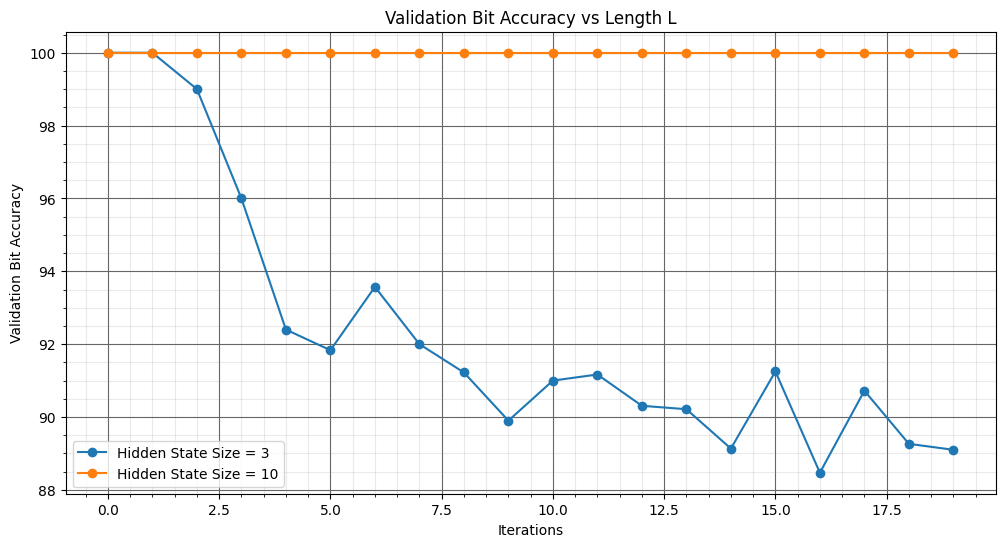

In [94]:
plt.figure(figsize=(12, 6))
x = np.arange(len(correctarr1))
plt.plot(x, correctarr1, label="Hidden State Size = 3", marker='o')
plt.plot(x, correctarr2, label="Hidden State Size = 10", marker='o')
plt.grid(which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel('Iterations')
plt.ylabel('Validation Bit Accuracy')
plt.title('Validation Bit Accuracy vs Length L')
plt.legend()
plt.show()

**MSE vs CE Comparison**

In [107]:
learning_rate = 0.01
epochs = 10
criterion5 = nn.MSELoss()
model5_5_mse=LSTM_2(5)
optimizer5_5_mse = torch.optim.Adam(model5_5_mse.parameters(), lr=learning_rate)
model5_5_ce=LSTM_2(5)
optimizer5_5_ce = torch.optim.Adam(model5_5_ce.parameters(), lr=learning_rate)

In [108]:
train_loss_5_mse = []
val_loss_5_mse = []
val_acc_5_mse = []

for epoch in range(epochs):
    # Training loop
    for i in range(int(len(train_X))):
        a = torch.zeros((1, train_X[i].shape[0], train_X[i].shape[1]))
        a[0] = torch.from_numpy(train_X[i])
        output = model5_5_mse(a.float())
        label = torch.tensor(np.transpose(train_Y[i]))
        loss = criterion5(output, label.float())
        train_loss_5_mse.append(loss.item())

        optimizer5_5_mse.zero_grad()
        loss.backward()
        optimizer5_5_mse.step()

    # Validation loop
    iteration = 0
    tempvalloss = 0
    correctval = 0

    for i in range(len(val_X)):
        correct = 0
        a = torch.zeros((1, val_X[i].shape[0], val_X[i].shape[1]))
        a[0] = torch.from_numpy(val_X[i])
        output = model5_5_mse(a.float())
        label = torch.tensor(np.transpose(val_Y[i]))
        loss = criterion5(output, label.float())
        iteration += 1
        tempvalloss += loss.item()

        predicted = torch.zeros(output.shape)
        predicted[output >= 0.5] = 1
        predicted[output < 0.5] = 0
        correct += (predicted == label.float()).sum().item() / len(label)

    val_acc_5_mse.append(100 * correct / iteration)
    val_loss_5_mse.append(tempvalloss / iteration)

    # Print the validation loss and accuracy after each epoch
    print(f"Epoch [{epoch+1}/{epochs}] - Val Loss: {val_loss_5_mse[-1]:.4f}, Val Accuracy: {val_acc_5_mse[-1]:.4f}%")


Epoch [1/10] - Val Loss: 0.2230, Val Accuracy: 0.6364%
Epoch [2/10] - Val Loss: 0.0657, Val Accuracy: 0.8182%
Epoch [3/10] - Val Loss: 0.0256, Val Accuracy: 1.0000%
Epoch [4/10] - Val Loss: 0.0101, Val Accuracy: 1.0000%
Epoch [5/10] - Val Loss: 0.0051, Val Accuracy: 1.0000%
Epoch [6/10] - Val Loss: 0.0031, Val Accuracy: 1.0000%
Epoch [7/10] - Val Loss: 0.0020, Val Accuracy: 1.0000%
Epoch [8/10] - Val Loss: 0.0014, Val Accuracy: 1.0000%
Epoch [9/10] - Val Loss: 0.0010, Val Accuracy: 1.0000%
Epoch [10/10] - Val Loss: 0.0008, Val Accuracy: 1.0000%


In [110]:
criterion5_ce=nn.CrossEntropyLoss()
train_loss_5_ce=[]
val_loss_5_ce=[]
val_acc_5_ce=[]
for epoch in range(epochs):
  for i in range(int(len(train_X))):
    a=torch.zeros((1,train_X[i].shape[0],train_X[i].shape[1]))
    a[0]=torch.from_numpy(train_X[i])
    output=model5_5_ce(a.float())
    label=torch.tensor(np.transpose(train_Y[i]))
    loss=criterion5_ce(output,label.float())
    train_loss_5_ce.append(loss.item())

    optimizer5_5_ce.zero_grad()
    loss.backward()
    optimizer5_5_ce.step()

  iteration=0
  tempvalloss=0
  correctval=0

  for i in range(len(val_X)):
    correct=0
    a=torch.zeros((1,val_X[i].shape[0],val_X[i].shape[1]))
    a[0]=torch.from_numpy(val_X[i])
    output=model5_5_ce(a.float())
    label=torch.tensor(np.transpose(val_Y[i]))
    loss=criterion5_ce(output,label.float())
    iteration+=1
    tempvalloss+=loss.item()

    predicted=torch.zeros(output.shape)
    predicted[output>=0.5]=1
    predicted[output<0.5]=0
    correct += (predicted == label.float()).sum().item()/len(label)

  val_acc_5_ce.append(100*correct/iteration)
  val_loss_5_ce.append(tempvalloss/iteration)
  # Print the validation loss and accuracy after each epoch
  print(f"Epoch [{epoch+1}/{epochs}] - Val Loss: {val_loss_5_ce[-1]:.4f}, Val Accuracy: {val_acc_5_ce[-1]:.2f}%")


Epoch [1/10] - Val Loss: 11.8348, Val Accuracy: 0.55%
Epoch [2/10] - Val Loss: 10.7565, Val Accuracy: 0.91%
Epoch [3/10] - Val Loss: 10.3282, Val Accuracy: 1.00%
Epoch [4/10] - Val Loss: 10.2611, Val Accuracy: 1.00%
Epoch [5/10] - Val Loss: 10.2433, Val Accuracy: 1.00%
Epoch [6/10] - Val Loss: 10.2356, Val Accuracy: 1.00%
Epoch [7/10] - Val Loss: 10.2315, Val Accuracy: 1.00%
Epoch [8/10] - Val Loss: 10.2290, Val Accuracy: 1.00%
Epoch [9/10] - Val Loss: 10.2274, Val Accuracy: 1.00%
Epoch [10/10] - Val Loss: 10.2262, Val Accuracy: 1.00%


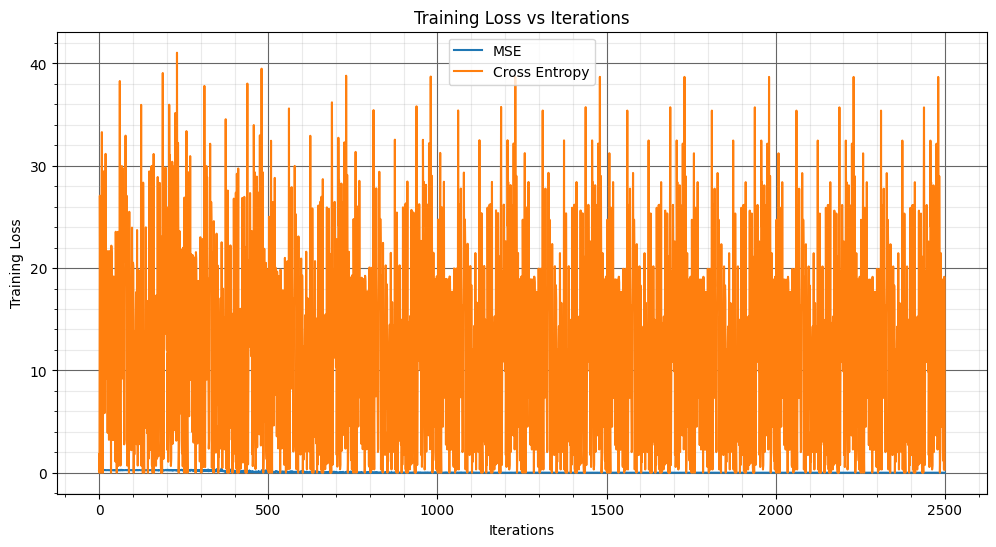

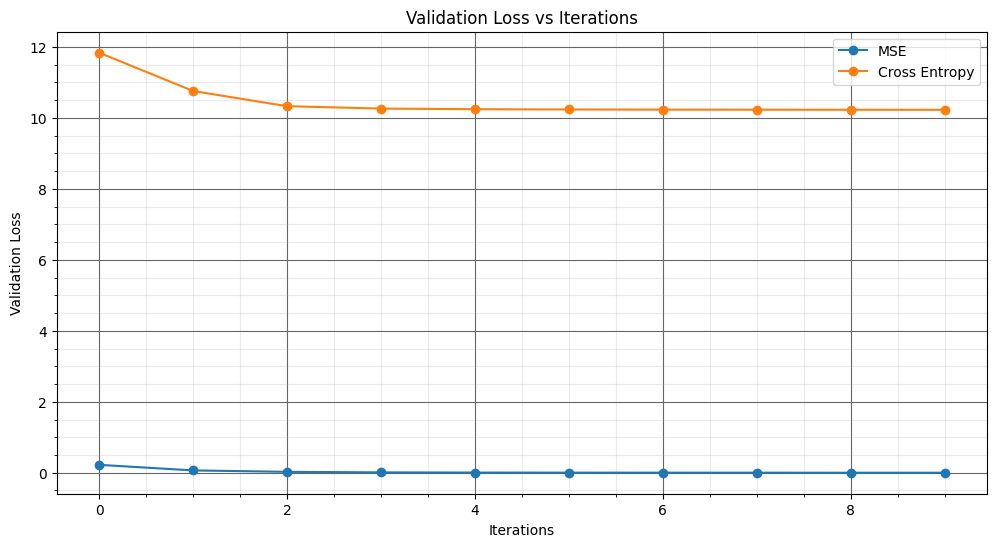

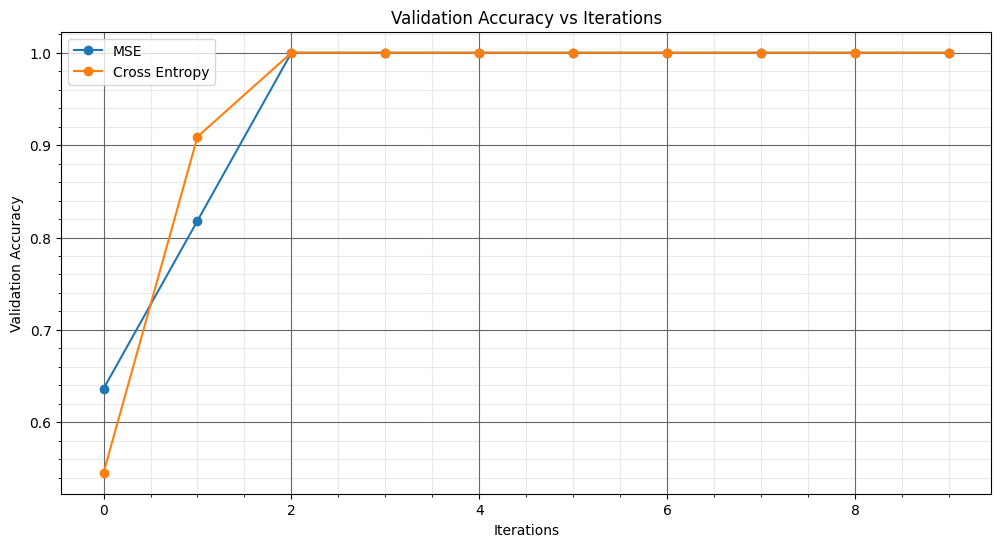

In [112]:
plt_1 = plt.figure(figsize=(12, 6))
plt.figure(1)
xtrainloss = np.arange(len(train_loss_5_mse))
plt.plot(xtrainloss, train_loss_5_mse, label="MSE")
plt.plot(xtrainloss, train_loss_5_ce, label="Cross Entropy")
plt.grid(True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Iterations')
plt.legend()

plt_1 = plt.figure(figsize=(12, 6))
plt.figure(2)
xtestloss = np.arange(len(val_loss_5_mse))
plt.plot(xtestloss, val_loss_5_mse, label="MSE", marker='o')
plt.plot(xtestloss, val_loss_5_ce, label="Cross Entropy", marker='o')
plt.grid(True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel('Iterations')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs Iterations')
plt.legend()

plt_1 = plt.figure(figsize=(12, 6))
plt.figure(3)
xbittrain = np.arange(len(val_acc_5_mse))
plt.plot(xbittrain, val_acc_5_mse, label="MSE", marker='o')
plt.plot(xbittrain, val_acc_5_ce, label="Cross Entropy", marker='o')
plt.grid(True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel('Iterations')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs Iterations')
plt.legend()

plt.show()

In [113]:
model5_5_mse.eval()
correctarr1 = np.zeros(20)
correctarr2 = np.zeros(20)
with torch.no_grad():
    for i in range(len(test_X)):
      a=torch.zeros((1,test_X[i].shape[0],test_X[i].shape[1]))
      a[0]=torch.from_numpy(test_X[i])
      output=model5_5_mse(a.float())
      label=torch.tensor(np.transpose(test_Y[i]))
      predicted=torch.zeros(output.shape)
      predicted[output>=0.5]=1
      predicted[output<0.5]=0
      correctarr1[len(label)-1] += (predicted == label.float()).sum().item()/(len(label))


    print('Accuracy with MSE:',(np.sum(correctarr1)/20))

model5_5_ce.eval()
with torch.no_grad():
    for i in range(len(test_X)):
      a=torch.zeros((1,test_X[i].shape[0],test_X[i].shape[1]))
      a[0]=torch.from_numpy(test_X[i])
      output=model5_5_ce(a.float())
      label=torch.tensor(np.transpose(test_Y[i]))
      predicted=torch.zeros(output.shape)
      predicted[output>0.5]=1
      predicted[output<=0.5]=0
      correctarr2[len(label)-1] += (predicted == label.float()).sum().item()/(len(label))
    print('Accuracy with Cross Entropy:',(np.sum(correctarr2)/20))

Accuracy with MSE: 100.0
Accuracy with Cross Entropy: 100.0


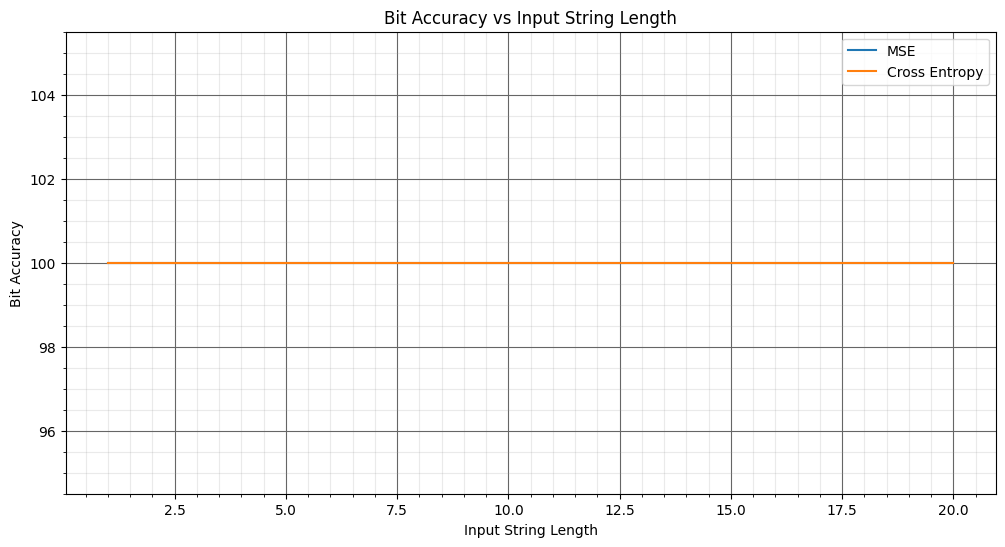

In [114]:
x = np.arange(1, 21)
plt_1 = plt.figure(figsize=(12, 6))
plt.figure(1)
plt.plot(x, correctarr1, label="MSE")
plt.plot(x, correctarr2, label="Cross Entropy")
plt.grid(True, which='major', color='#666666', linestyle='-')  # Use `True` instead of `b=True`
plt.minorticks_on()
plt.grid(True, which='minor', color='#999999', linestyle='-', alpha=0.2)  # Use `True` here as well
plt.xlabel('Input String Length')
plt.ylabel('Bit Accuracy')
plt.title('Bit Accuracy vs Input String Length')
plt.legend()
plt.show()

**Training on Fixed Length Inputs L=3,5,10 for State Vector Size = 5**

In [135]:
train_X_3=[]
train_Y_3=[]
for i in range(250):
  a,b=bin_generator(3)
  train_X_3.append(a)
  train_Y_3.append(b)

train_X_5=[]
train_Y_5=[]
for i in range(250):
  a,b=bin_generator(5)
  train_X_5.append(a)
  train_Y_5.append(b)

train_X_10=[]
train_Y_10=[]
for i in range(250):
  a,b=bin_generator(10)
  train_X_10.append(a)
  train_Y_10.append(b)

In [136]:
learning_rate = 0.01
epochs = 10
criterion5 = nn.MSELoss()
model55=LSTM_2(5)
optimizer55 = torch.optim.Adam(model55.parameters(), lr=learning_rate)
model56=LSTM_2(5)
optimizer56 = torch.optim.Adam(model56.parameters(), lr=learning_rate)
model57=LSTM_2(5)
optimizer57 = torch.optim.Adam(model57.parameters(), lr=learning_rate)

In [137]:
train_loss_3=[]
val_loss_3=[]
val_acc_3=[]
for epoch in range(epochs):
  for i in range(len(train_X_3)):
    a=torch.zeros((1,train_X_3[i].shape[0],train_X_3[i].shape[1]))
    a[0]=torch.from_numpy(train_X_3[i])
    output=model55(a.float())
    label=torch.tensor(np.transpose(train_Y_3[i]))
    loss = criterion5(output,label.float())
    train_loss_3.append(loss.item())

    optimizer55.zero_grad()
    loss.backward()
    optimizer55.step()

  iteration=0
  tempvalloss=0
  correctval=0

  for i in range(len(val_X)):
    correct=0
    a=torch.zeros((1,val_X[i].shape[0],val_X[i].shape[1]))
    a[0]=torch.from_numpy(val_X[i])
    output=model55(a.float())
    label=torch.tensor(np.transpose(val_Y[i]))
    loss = criterion5(output,label.float())
    iteration+=1
    tempvalloss+=loss.item()

    predicted=torch.zeros(output.shape)
    predicted[output>=0.5]=1
    predicted[output<0.5]=0
    correct += (predicted == label.float()).sum().item()/len(label)

  val_acc_3.append(100*correct/iteration)
  val_loss_3.append(tempvalloss/iteration)
  print('Epoch [',epoch+1,'/',epochs,'] : completed.')

Epoch [ 1 / 10 ] : completed.
Epoch [ 2 / 10 ] : completed.
Epoch [ 3 / 10 ] : completed.
Epoch [ 4 / 10 ] : completed.
Epoch [ 5 / 10 ] : completed.
Epoch [ 6 / 10 ] : completed.
Epoch [ 7 / 10 ] : completed.
Epoch [ 8 / 10 ] : completed.
Epoch [ 9 / 10 ] : completed.
Epoch [ 10 / 10 ] : completed.


In [138]:
train_loss_5=[]
val_loss_5=[]
val_acc_5=[]
for epoch in range(epochs):
  for i in range(int(len(train_X_5))):
    a=torch.zeros((1,train_X_5[i].shape[0],train_X_5[i].shape[1]))
    a[0]=torch.from_numpy(train_X_5[i])
    output=model56(a.float())
    label=torch.tensor(np.transpose(train_Y_5[i]))
    loss = criterion5(output,label.float())
    train_loss_5.append(loss.item())

    optimizer56.zero_grad()
    loss.backward()
    optimizer56.step()

  iteration=0
  tempvalloss=0
  correctval=0

  for i in range(len(val_X)):
    correct=0
    a=torch.zeros((1,val_X[i].shape[0],val_X[i].shape[1]))
    a[0]=torch.from_numpy(val_X[i])
    output=model56(a.float())
    label=torch.tensor(np.transpose(val_Y[i]))
    loss = criterion5(output,label.float())
    iteration+=1
    tempvalloss+=loss.item()

    predicted=torch.zeros(output.shape)
    predicted[output>=0.5]=1
    predicted[output<0.5]=0
    correct += (predicted == label.float()).sum().item()/len(label)

  val_acc_5.append(100*correct/iteration)
  val_loss_5.append(tempvalloss/iteration)
  print('Epoch [',epoch+1,'/',epochs,'] : completed.')

Epoch [ 1 / 10 ] : completed.
Epoch [ 2 / 10 ] : completed.
Epoch [ 3 / 10 ] : completed.
Epoch [ 4 / 10 ] : completed.
Epoch [ 5 / 10 ] : completed.
Epoch [ 6 / 10 ] : completed.
Epoch [ 7 / 10 ] : completed.
Epoch [ 8 / 10 ] : completed.
Epoch [ 9 / 10 ] : completed.
Epoch [ 10 / 10 ] : completed.


In [139]:
train_loss_10=[]
val_loss_10=[]
val_acc_10=[]
for epoch in range(epochs):
  for i in range(int(len(train_X_10))):
    a=torch.zeros((1,train_X_10[i].shape[0],train_X_10[i].shape[1]))
    a[0]=torch.from_numpy(train_X_10[i])
    output=model57(a.float())
    label=torch.tensor(np.transpose(train_Y_10[i]))
    loss = criterion5(output,label.float())
    train_loss_10.append(loss.item())

    optimizer57.zero_grad()
    loss.backward()
    optimizer57.step()

  iteration=0
  tempvalloss=0
  correctval=0

  for i in range(len(val_X)):
    correct=0
    a=torch.zeros((1,val_X[i].shape[0],val_X[i].shape[1]))
    a[0]=torch.from_numpy(val_X[i])
    output=model57(a.float())
    label=torch.tensor(np.transpose(val_Y[i]))
    loss = criterion5(output,label.float())
    iteration+=1
    tempvalloss+=loss.item()

    predicted=torch.zeros(output.shape)
    predicted[output>=0.5]=1
    predicted[output<0.5]=0
    correct += (predicted == label.float()).sum().item()/len(label)

  val_acc_10.append(100*correct/iteration)
  val_loss_10.append(tempvalloss/iteration)
  print('Epoch [',epoch+1,'/',epochs,'] : completed.')

Epoch [ 1 / 10 ] : completed.
Epoch [ 2 / 10 ] : completed.
Epoch [ 3 / 10 ] : completed.
Epoch [ 4 / 10 ] : completed.
Epoch [ 5 / 10 ] : completed.
Epoch [ 6 / 10 ] : completed.
Epoch [ 7 / 10 ] : completed.
Epoch [ 8 / 10 ] : completed.
Epoch [ 9 / 10 ] : completed.
Epoch [ 10 / 10 ] : completed.


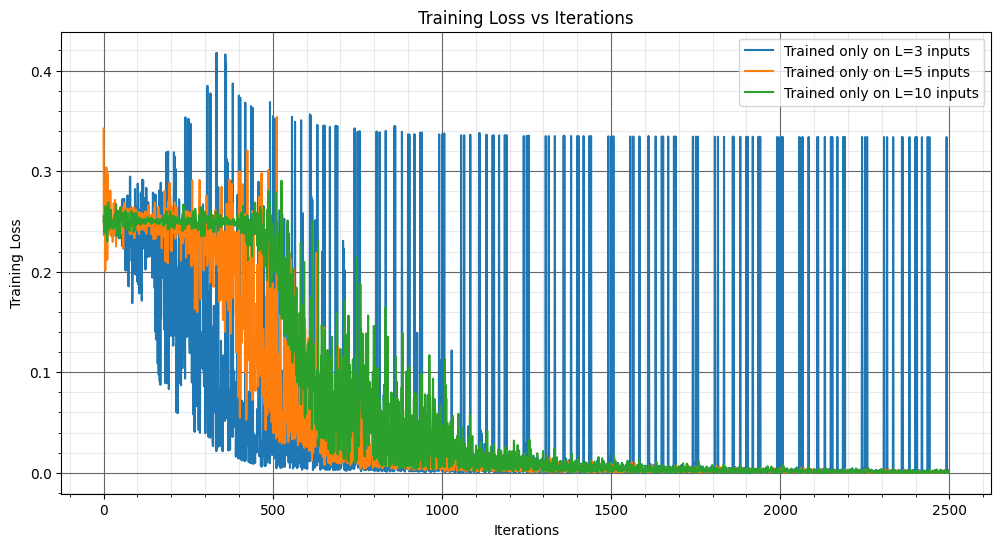

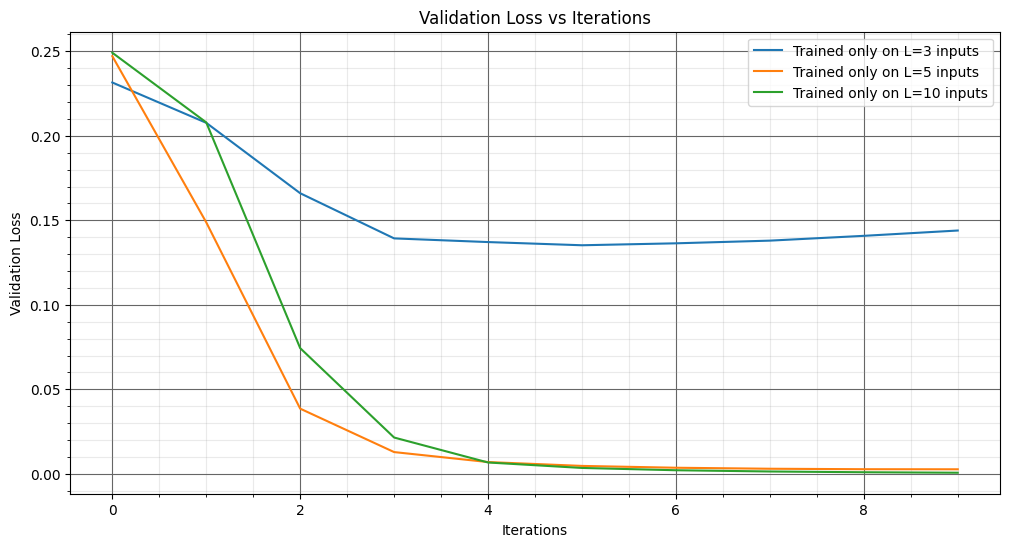

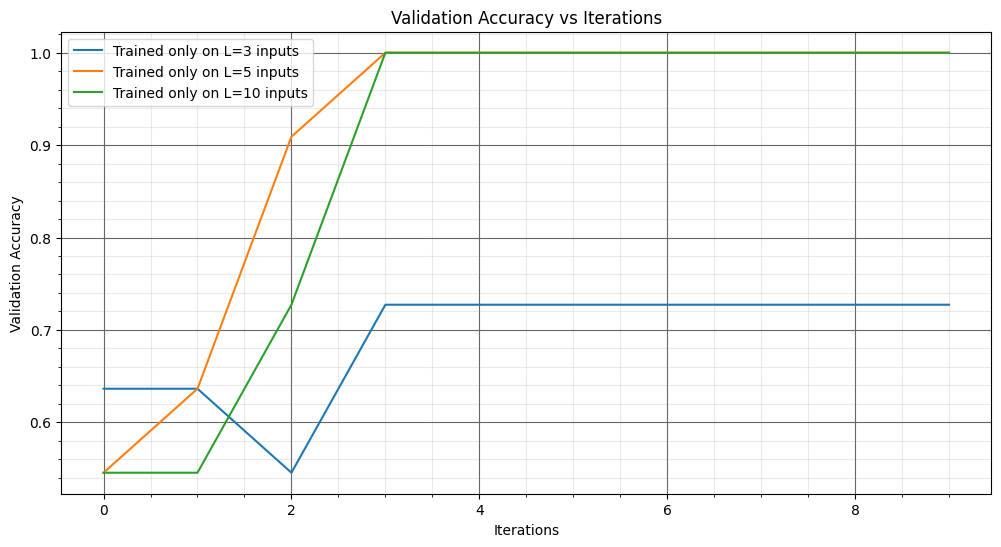

In [140]:
plt_1 = plt.figure(figsize=(12, 6))
plt.figure(1)
xtrainloss = np.arange(len(train_loss_3))
plt.plot(xtrainloss, train_loss_3, label="Trained only on L=3 inputs")
plt.plot(xtrainloss, train_loss_5, label="Trained only on L=5 inputs")
plt.plot(xtrainloss, train_loss_10, label="Trained only on L=10 inputs")
plt.grid(True, which='major', color='#666666', linestyle='-')  # Use True instead of b=True
plt.minorticks_on()
plt.grid(True, which='minor', color='#999999', linestyle='-', alpha=0.2)  # Use True here as well
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Iterations')
plt.legend()

plt_1 = plt.figure(figsize=(12, 6))
plt.figure(2)
xtestloss = np.arange(len(val_loss_3))
plt.plot(xtestloss, val_loss_3, label="Trained only on L=3 inputs")
plt.plot(xtestloss, val_loss_5, label="Trained only on L=5 inputs")
plt.plot(xtestloss, val_loss_10, label="Trained only on L=10 inputs")
plt.grid(True, which='major', color='#666666', linestyle='-')  # Use True instead of b=True
plt.minorticks_on()
plt.grid(True, which='minor', color='#999999', linestyle='-', alpha=0.2)  # Use True here as well
plt.xlabel('Iterations')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs Iterations')
plt.legend()

plt_1 = plt.figure(figsize=(12, 6))
plt.figure(3)
xbittrain = np.arange(len(val_acc_3))
plt.plot(xbittrain, val_acc_3, label="Trained only on L=3 inputs")
plt.plot(xbittrain, val_acc_5, label="Trained only on L=5 inputs")
plt.plot(xbittrain, val_acc_10, label="Trained only on L=10 inputs")
plt.grid(True, which='major', color='#666666', linestyle='-')  # Use True instead of b=True
plt.minorticks_on()
plt.grid(True, which='minor', color='#999999', linestyle='-', alpha=0.2)  # Use True here as well
plt.xlabel('Iterations')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs Iterations')
plt.legend()

plt.show()

In [141]:
model55.eval()
correctarr1 = np.zeros(20)
correctarr2 = np.zeros(20)
correctarr3 = np.zeros(20)
with torch.no_grad():
    for i in range(len(test_X)):
      a=torch.zeros((1,test_X[i].shape[0],test_X[i].shape[1]))
      a[0]=torch.from_numpy(test_X[i])
      output=model55(a.float())
      label=torch.tensor(np.transpose(test_Y[i]))
      predicted=torch.zeros(output.shape)
      predicted[output>=0.5]=1
      predicted[output<0.5]=0
      correctarr1[len(label)-1] += (predicted == label.float()).sum().item()/(len(label))


    print('Accuracy when trained on L=3 inputs:',(np.sum(correctarr1)/20))

model56.eval()
with torch.no_grad():
    for i in range(len(test_X)):
      a=torch.zeros((1,test_X[i].shape[0],test_X[i].shape[1]))
      a[0]=torch.from_numpy(test_X[i])
      output=model56(a.float())
      label=torch.tensor(np.transpose(test_Y[i]))
      predicted=torch.zeros(output.shape)
      predicted[output>0.5]=1
      predicted[output<=0.5]=0
      correctarr2[len(label)-1] += (predicted == label.float()).sum().item()/(len(label))
    print('Accuracy when trained on L=5 inputs:',(np.sum(correctarr2)/20))

model57.eval()
with torch.no_grad():
    for i in range(len(test_X)):
      a=torch.zeros((1,test_X[i].shape[0],test_X[i].shape[1]))
      a[0]=torch.from_numpy(test_X[i])
      output=model57(a.float())
      label=torch.tensor(np.transpose(test_Y[i]))
      predicted=torch.zeros(output.shape)
      predicted[output>0.5]=1
      predicted[output<=0.5]=0
      correctarr3[len(label)-1] += (predicted == label.float()).sum().item()/(len(label))
    print('Accuracy when trained on L=10 inputs:',(np.sum(correctarr3)/20))

Accuracy when trained on L=3 inputs: 81.34994781555733
Accuracy when trained on L=5 inputs: 99.81076205785958
Accuracy when trained on L=10 inputs: 100.0


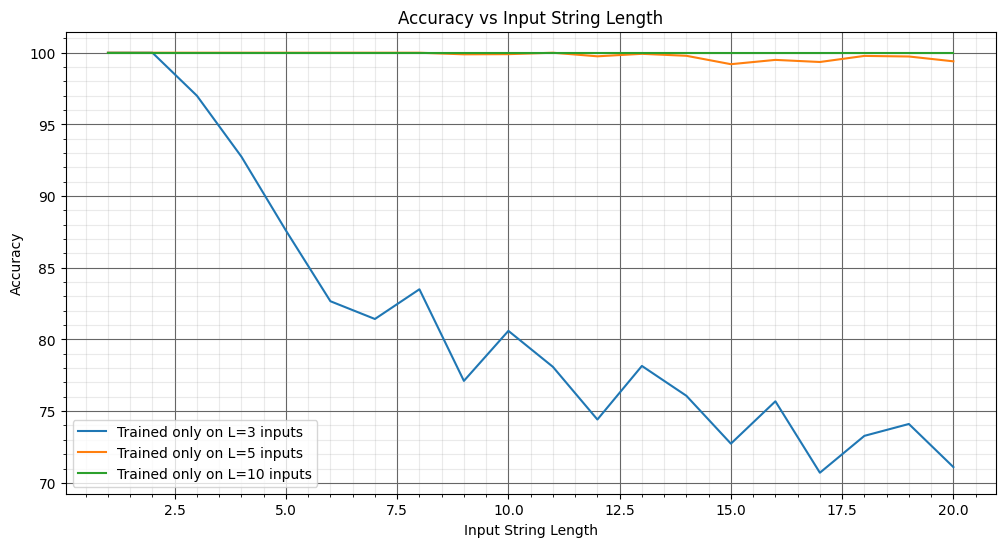

In [142]:
x = np.arange(1, 21)
plt_1 = plt.figure(figsize=(12, 6))
plt.figure(1)
plt.plot(x, correctarr1, label="Trained only on L=3 inputs")
plt.plot(x, correctarr2, label="Trained only on L=5 inputs")
plt.plot(x, correctarr3, label="Trained only on L=10 inputs")
plt.grid(True, which='major', color='#666666', linestyle='-')  # Corrected here
plt.minorticks_on()
plt.grid(True, which='minor', color='#999999', linestyle='-', alpha=0.2)  # Corrected here
plt.xlabel('Input String Length')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Input String Length')
plt.legend()
plt.show()

##**Observations**

- Accuracy Degradation with Shorter Training Lengths (L=3): When the LSTM model is trained on shorter input lengths (L=3), it performs well on similar short inputs but shows a rapid decline in accuracy as input length increases, falling to around 70% for length 20 inputs. This suggests that the model struggles to generalize effectively to much longer inputs when trained on very short sequences.

- Sustained Accuracy with Moderate (L=5) and Longer (L=10) Training Lengths: Training on inputs of L=5 results in nearly perfect accuracy across all tested lengths, with only a slight dip around L=15-20. Meanwhile, training on L=10 inputs achieves perfect generalization (100% accuracy) across all input lengths up to 20, indicating that the model generalizes well when trained on longer sequences.

- Training on longer sequences (L=10) enables the model to capture patterns that remain accurate and consistent over a wider range of input lengths, while shorter training sequences lead to decreased performance on longer, out-of-distribution inputs.